**Accident Dataset**


In [ ]:
# Data
import pandas as pd
import numpy as np
import missingno as msno

#Datetime
from datetime import datetime
import calendar


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Evaluation of performance

# for regression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import files
df = files.upload()

Saving Accident_dataset.csv to Accident_dataset.csv


In [ ]:
 # Read Data
#dataset = "%cd/content/drive/My Drive/Data 695/Accident_dataset.csv"
#df= pd.read_csv(dataset)

In [ ]:
df = pd.read_csv("Accident_dataset.csv")
df.head(5)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [ ]:
df.shape

(2795, 48)

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

None

In [ ]:
display(df.describe())

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


<Axes: >

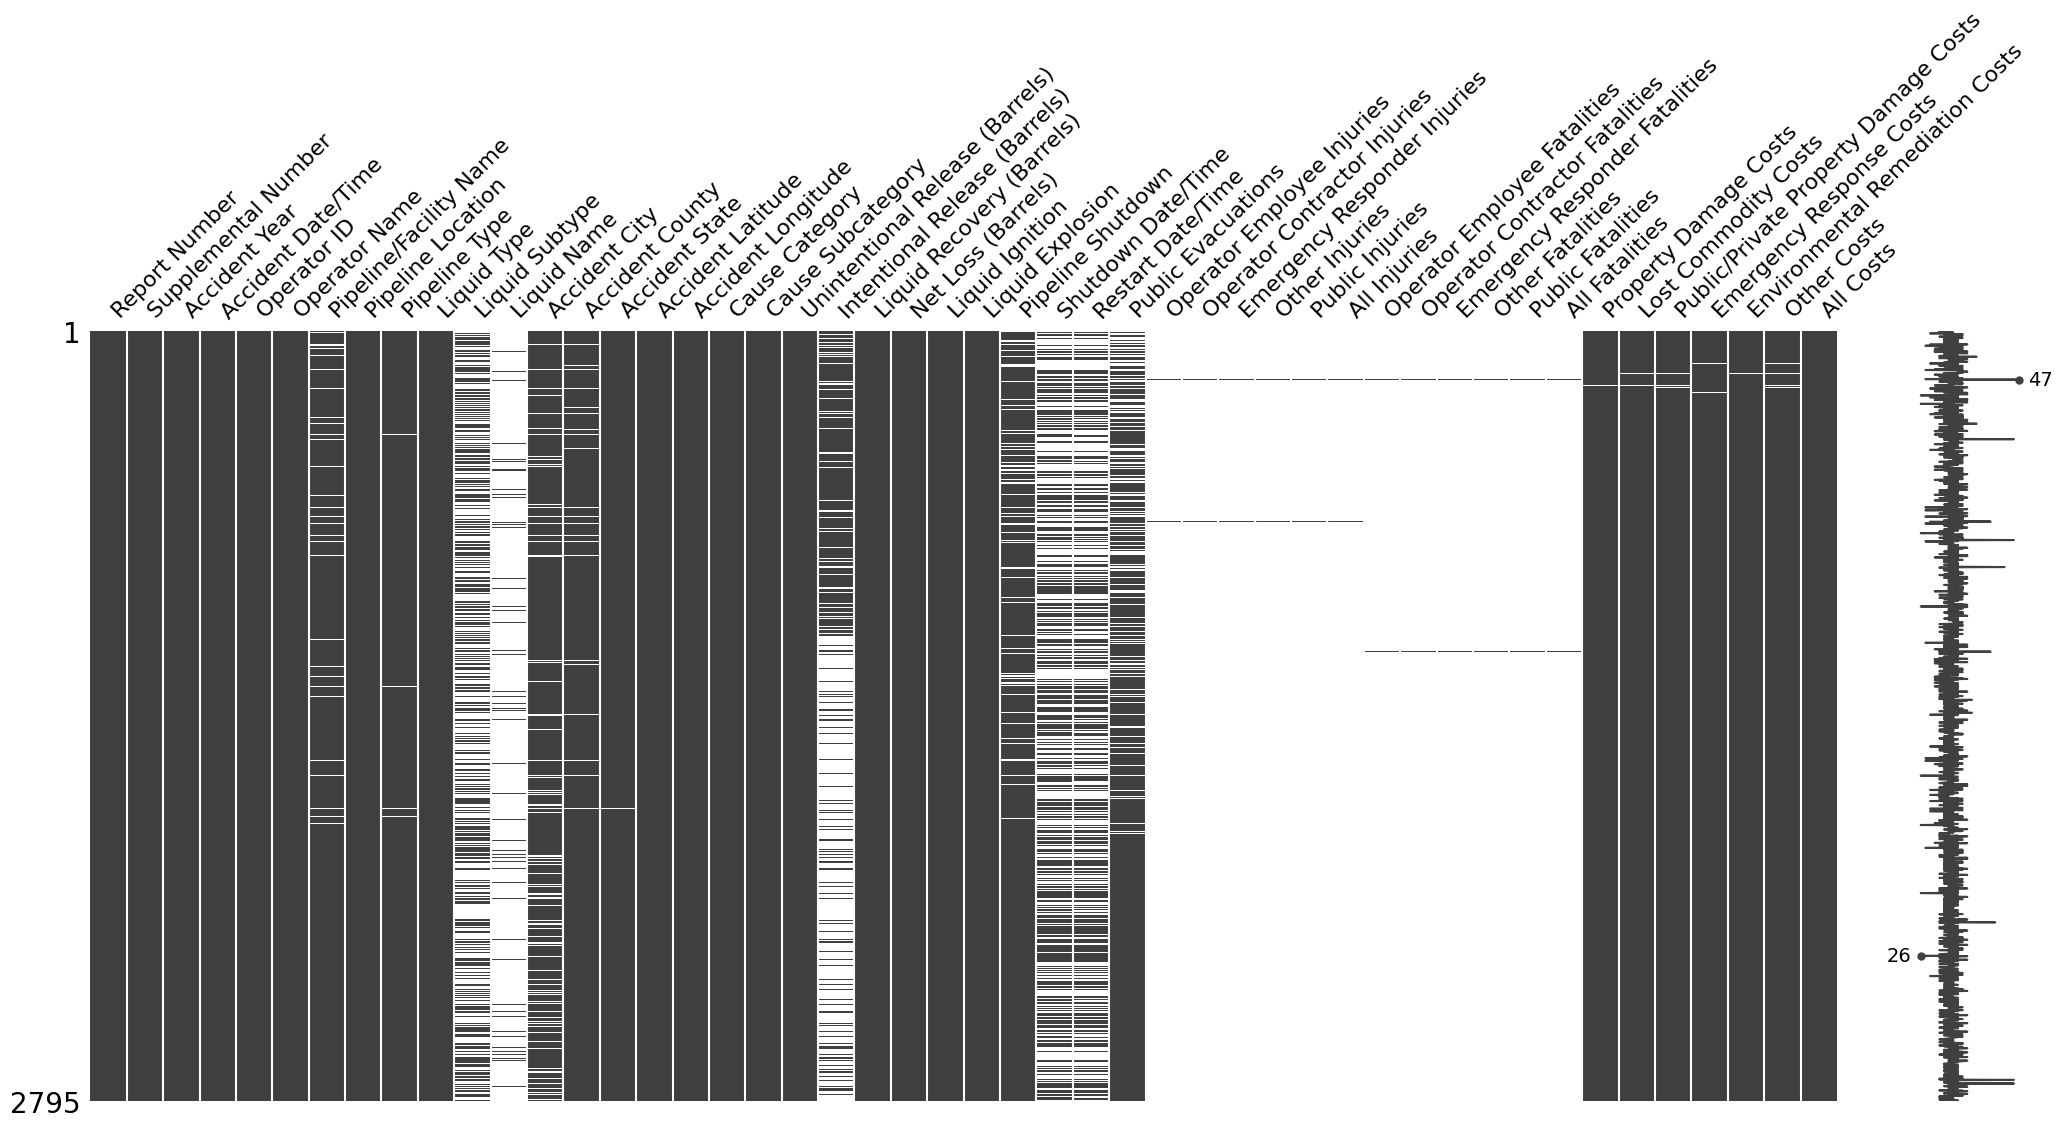

In [ ]:
#Check for missing Values:
import missingno as msno
msno.matrix(df)

In [ ]:
#df['column_name'] = df['column_name'].fillna(0)

In [ ]:
id = list(range(1, len(df) + 1))
df['id'] = id

In [ ]:
df_edit = df.fillna(0)

<Axes: >

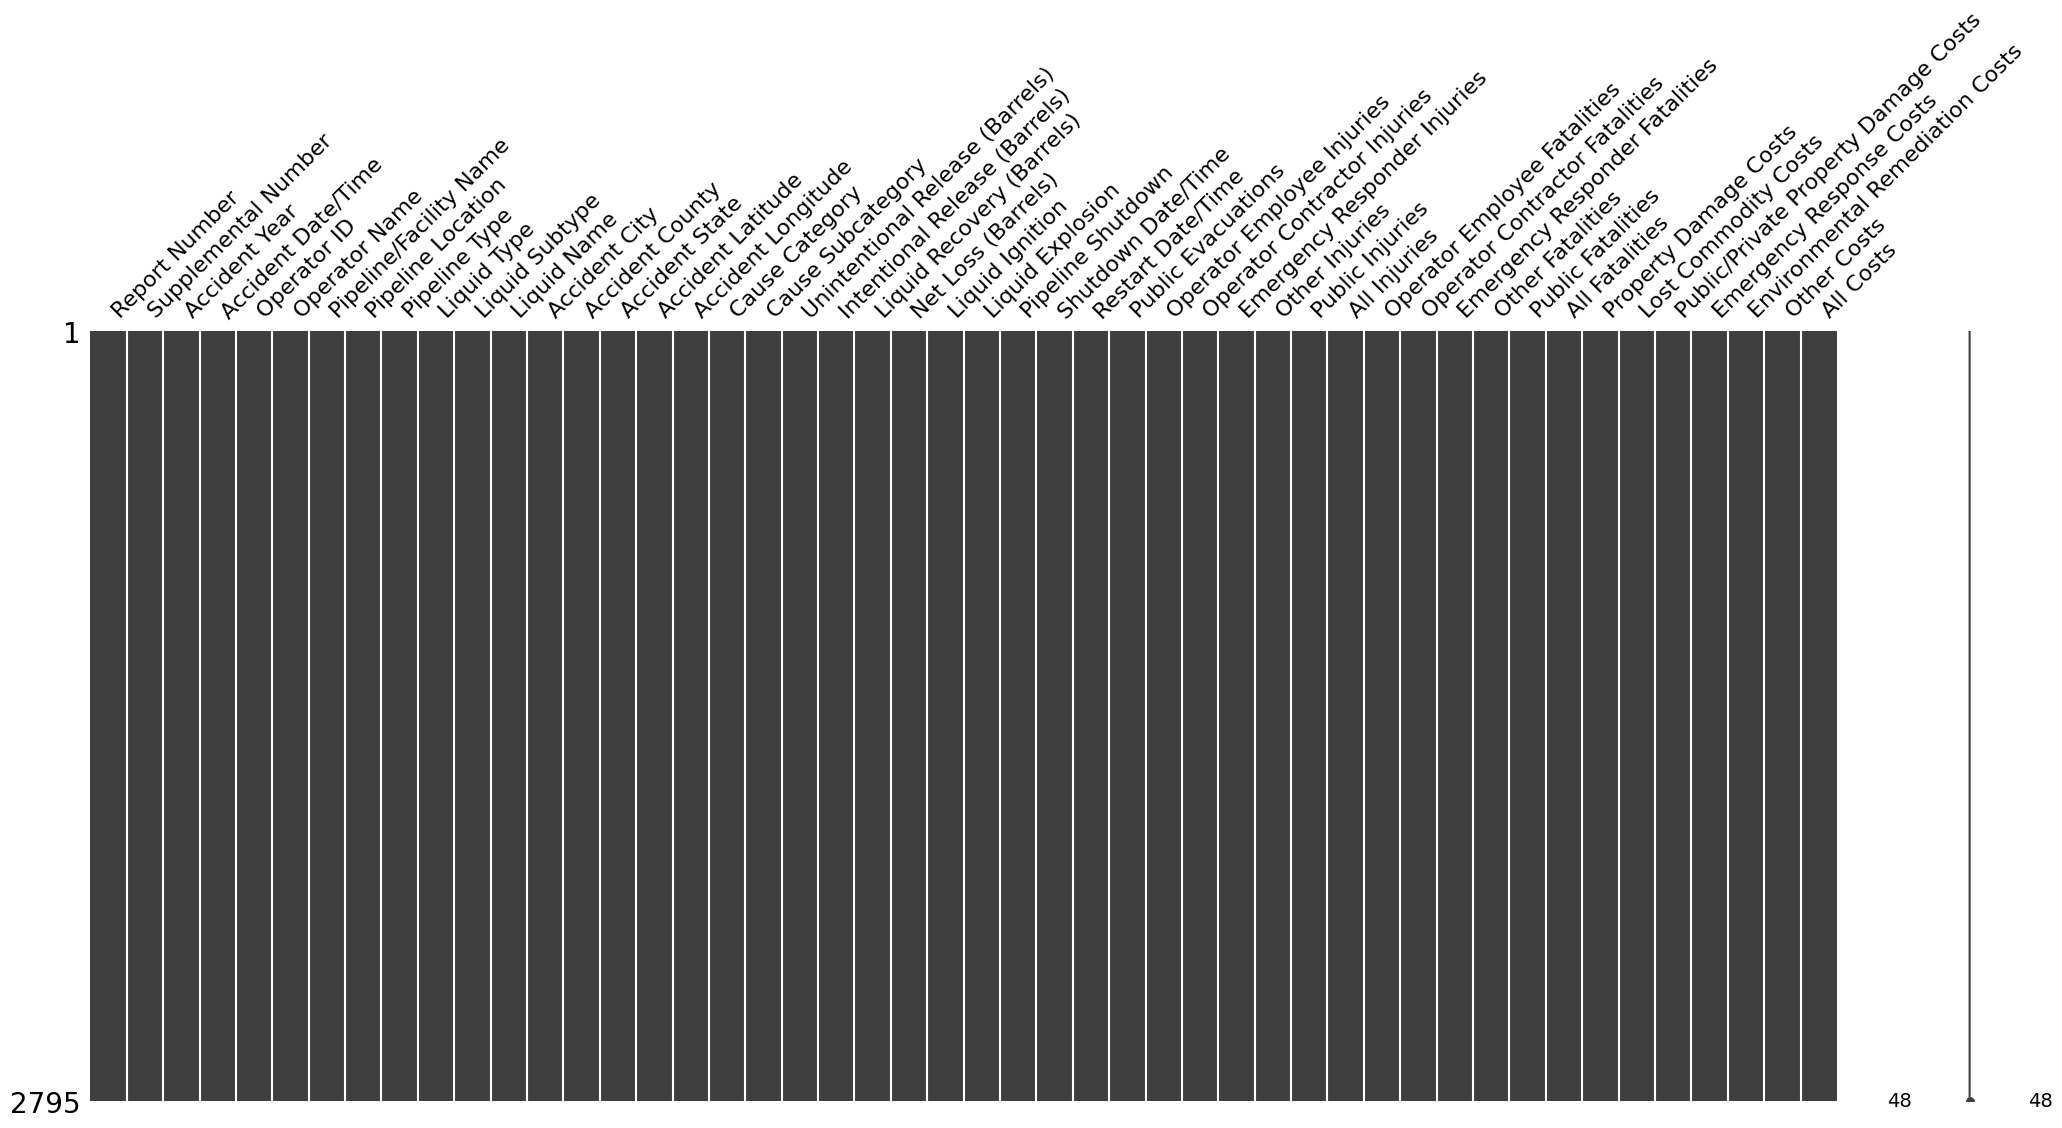

In [ ]:
msno.matrix(df_edit)

In [ ]:
df_edit.head(5)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,0.0,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,0.0,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,0.0,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,0.0,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [ ]:
# Accident Date/ Time
print(df_edit['Accident Date/Time'][100])
print(df_edit['Accident Date/Time'][100].split())
print(df_edit['Accident Date/Time'][100].split()[0])
print(df_edit['Accident Date/Time'][100].split()[1])

4/20/2010 2:56 PM
['4/20/2010', '2:56', 'PM']
4/20/2010
2:56


In [ ]:
# Split the date string again into year, month, and day
print(df_edit['Accident Date/Time'][100].split()[0])
print(df_edit['Accident Date/Time'][100].split()[0].split("/"))
print(df_edit['Accident Date/Time'][100].split()[0].split("/")[0])
print(df_edit['Accident Date/Time'][100].split()[0].split("/")[1])
print(df_edit['Accident Date/Time'][100].split()[0].split("/")[2])

4/20/2010
['4', '20', '2010']
4
20
2010


In [ ]:
df_edit['Accident Date'] = df_edit['Accident Date/Time'].apply(lambda x: x.split()[0])
df_edit['Accident Date']

0         1/1/2010
1         1/4/2010
2         1/5/2010
3         1/6/2010
4         1/7/2010
           ...    
2790    12/27/2016
2791    12/28/2016
2792    12/29/2016
2793      1/3/2017
2794      1/9/2017
Name: Accident Date, Length: 2795, dtype: object

In [ ]:
# Split the date string again into month
df_edit['Accident Month'] = df_edit['Accident Date/Time'].apply(lambda x : x.split()[0].split('/')[0])
df_edit['Accident Month']

0        1
1        1
2        1
3        1
4        1
        ..
2790    12
2791    12
2792    12
2793     1
2794     1
Name: Accident Month, Length: 2795, dtype: object

In [ ]:
# Split the date string again into day
df_edit['Accident Day'] = df_edit['Accident Date/Time'].apply(lambda x : x.split()[0].split('/')[1])
df_edit['Accident Day']

0        1
1        4
2        5
3        6
4        7
        ..
2790    27
2791    28
2792    29
2793     3
2794     9
Name: Accident Day, Length: 2795, dtype: object

In [ ]:
# Split the date string again into year
df_edit['Accident_Year']  = df_edit['Accident Date/Time'].apply(lambda x : x.split()[0].split('/')[2])
df_edit['Accident_Year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2790    2016
2791    2016
2792    2016
2793    2017
2794    2017
Name: Accident_Year, Length: 2795, dtype: object

In [ ]:
df_edit.head(5)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Accident Date,Accident Month,Accident Day,Accident_Year
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,1517.0,0.0,0.0,0.0,0.0,1627,1/1/2010,1,1,2010
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,8.0,0.0,0.0,0.0,0.0,4008,1/4/2010,1,4,2010
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,200.0,0.0,0.0,0.0,0.0,200,1/5/2010,1,5,2010
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,40.0,0.0,11300.0,0.0,0.0,11540,1/6/2010,1,6,2010
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,150.0,0.0,7500.0,2000.0,0.0,29650,1/7/2010,1,7,2010


In [ ]:
# Drop the desired column(s) from the dataframe
df1 = df_edit.drop(['Accident Date/Time','Accident Year','Supplemental Number', 'Report Number'], axis=1)

In [ ]:
df1.head()

,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Accident Date,Accident Month,Accident Day,Accident_Year
0,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0,MCPHERSON,MCPHERSON,...,1517.0,0.0,0.0,0.0,0.0,1627,1/1/2010,1,1,2010
1,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,RAYMOND,CUMBERLAND,...,8.0,0.0,0.0,0.0,0.0,4008,1/4/2010,1,4,2010
2,20160,"PETROLOGISTICS OLEFINS, LLC",0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,...,200.0,0.0,0.0,0.0,0.0,200,1/5/2010,1,5,2010
3,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SUPERIOR,DOUGLAS,...,40.0,0.0,11300.0,0.0,0.0,11540,1/6/2010,1,6,2010
4,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SHERMAN,GRAYSON,...,150.0,0.0,7500.0,2000.0,0.0,29650,1/7/2010,1,7,2010


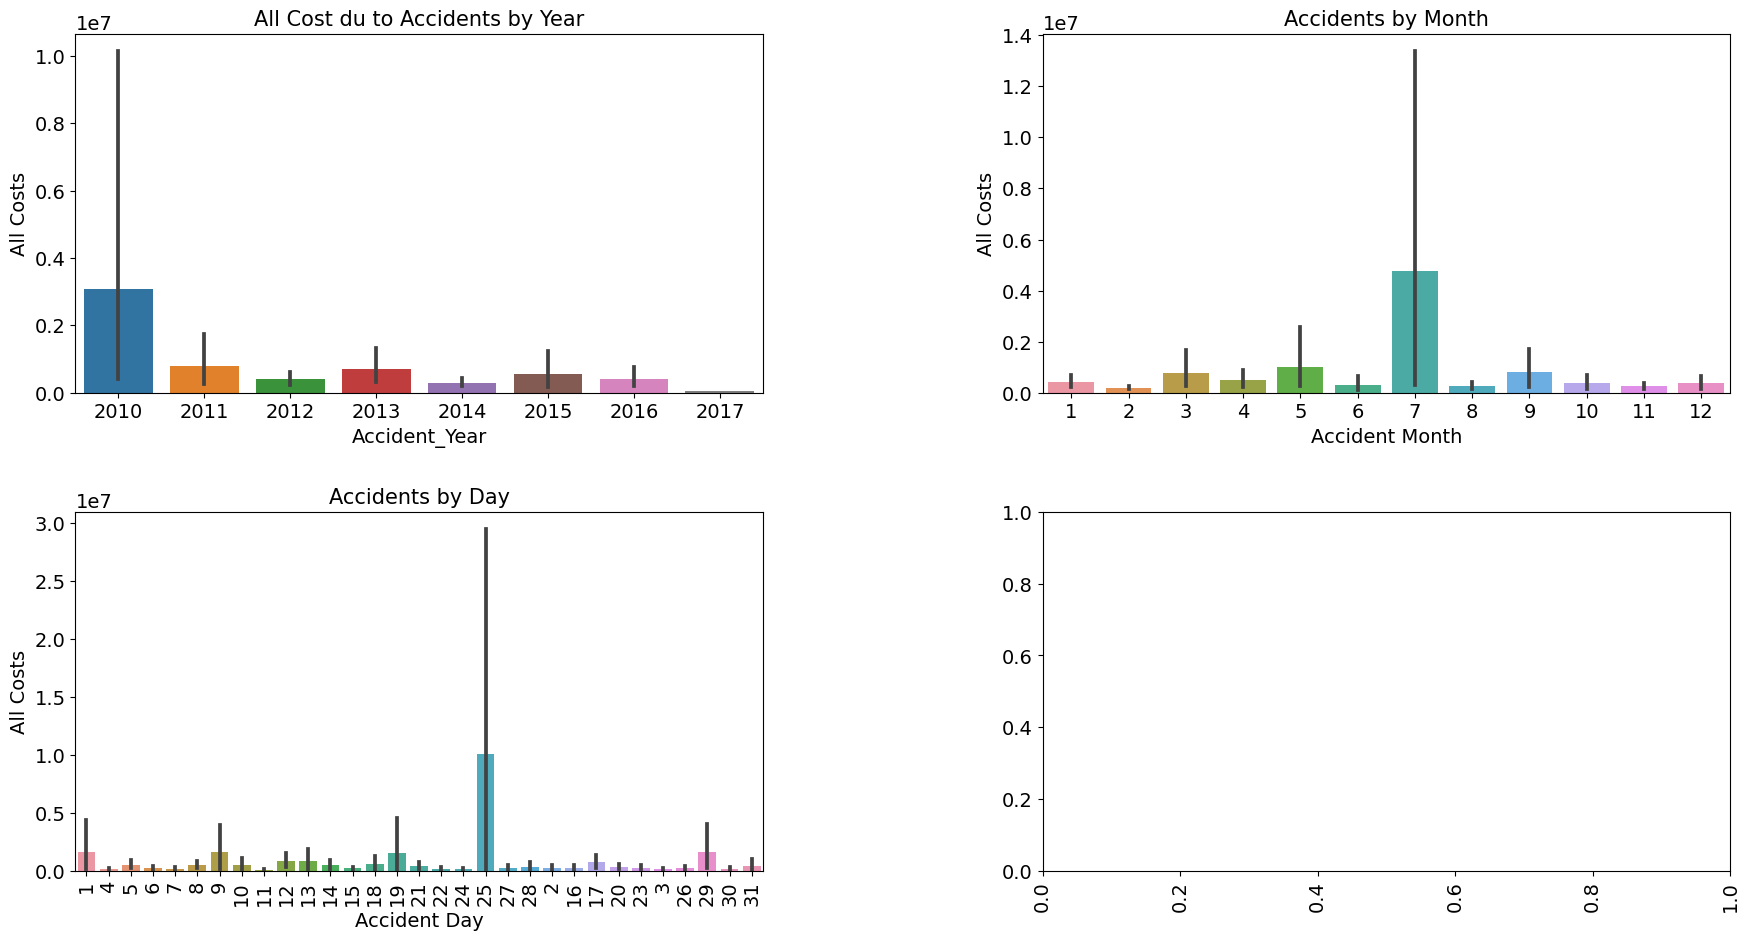

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(20, 10)

sns.barplot(x='Accident_Year', y='All Costs', data=df1, ax=axes[0, 0])
sns.barplot(x='Accident Month', y='All Costs', data=df1, ax=axes[0, 1])
sns.barplot(x='Accident Day', y='All Costs', data=df1, ax=axes[1, 0])


axes[0, 0].set(title='All Cost du to Accidents by Year')
axes[0, 1].set(title='Accidents by Month')
axes[1, 0].set(title='Accidents by Day')


axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

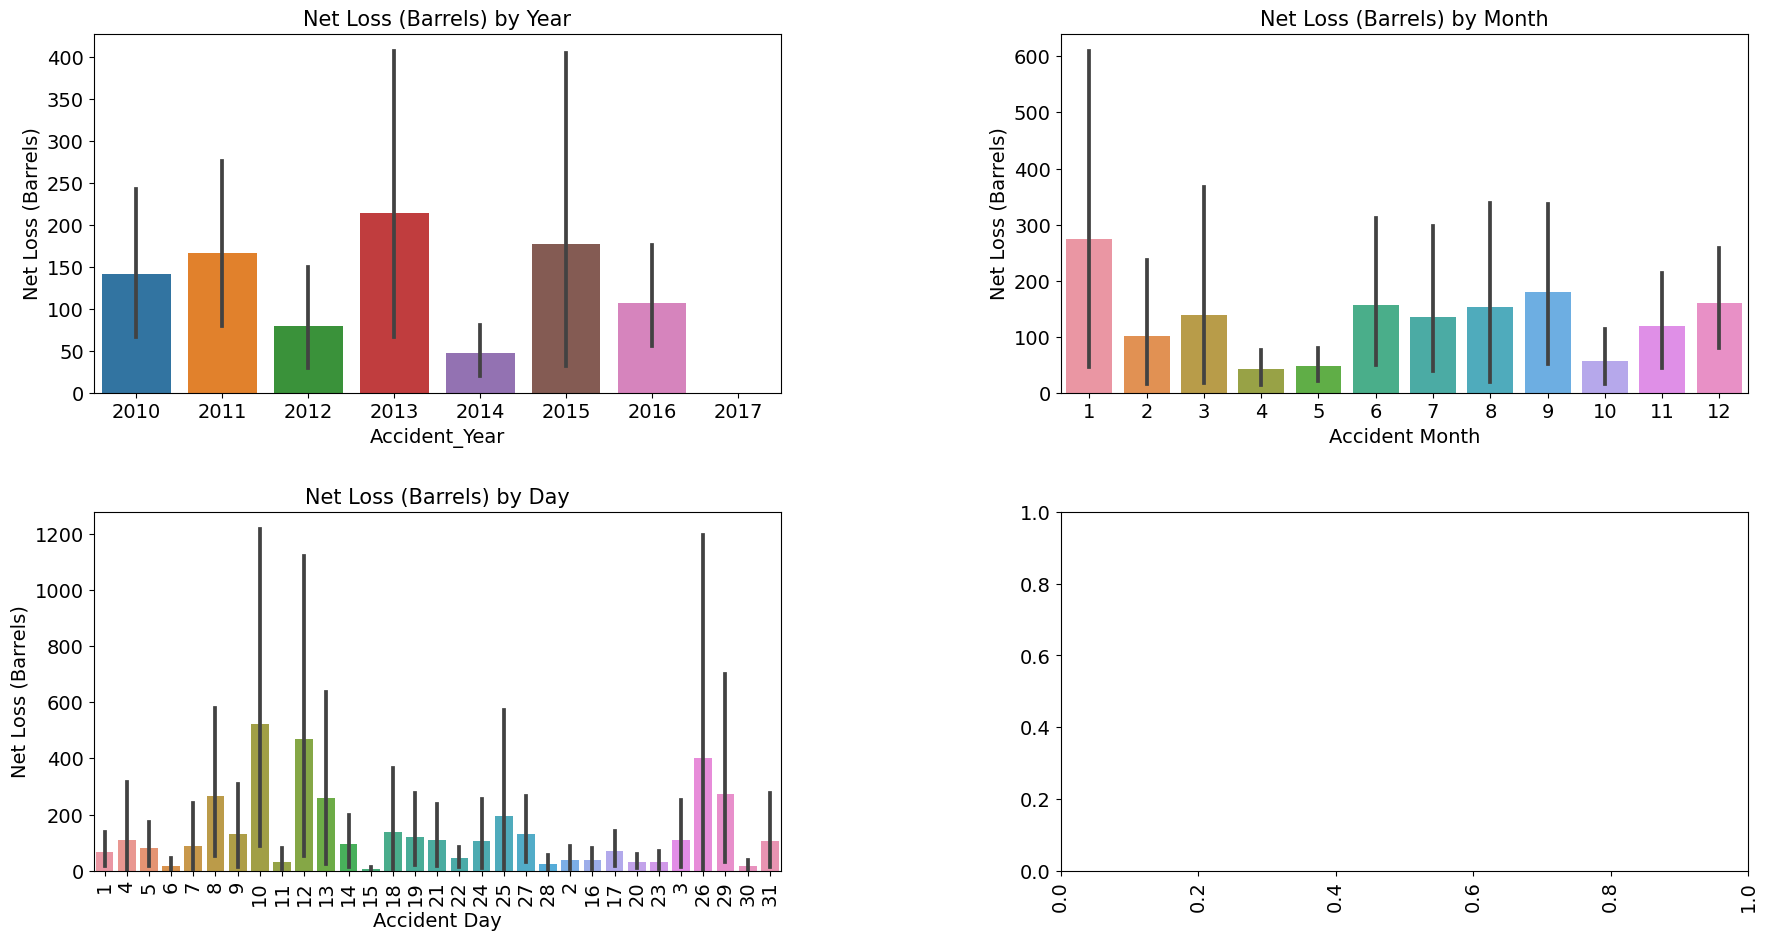

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(20, 10)

sns.barplot(x='Accident_Year', y='Net Loss (Barrels)', data=df1, ax=axes[0, 0])
sns.barplot(x='Accident Month', y='Net Loss (Barrels)', data=df1, ax=axes[0, 1])
sns.barplot(x='Accident Day', y='Net Loss (Barrels)', data=df1, ax=axes[1, 0])


axes[0, 0].set(title='Net Loss (Barrels) by Year')
axes[0, 1].set(title='Net Loss (Barrels) by Month')
axes[1, 0].set(title='Net Loss (Barrels) by Day')


axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

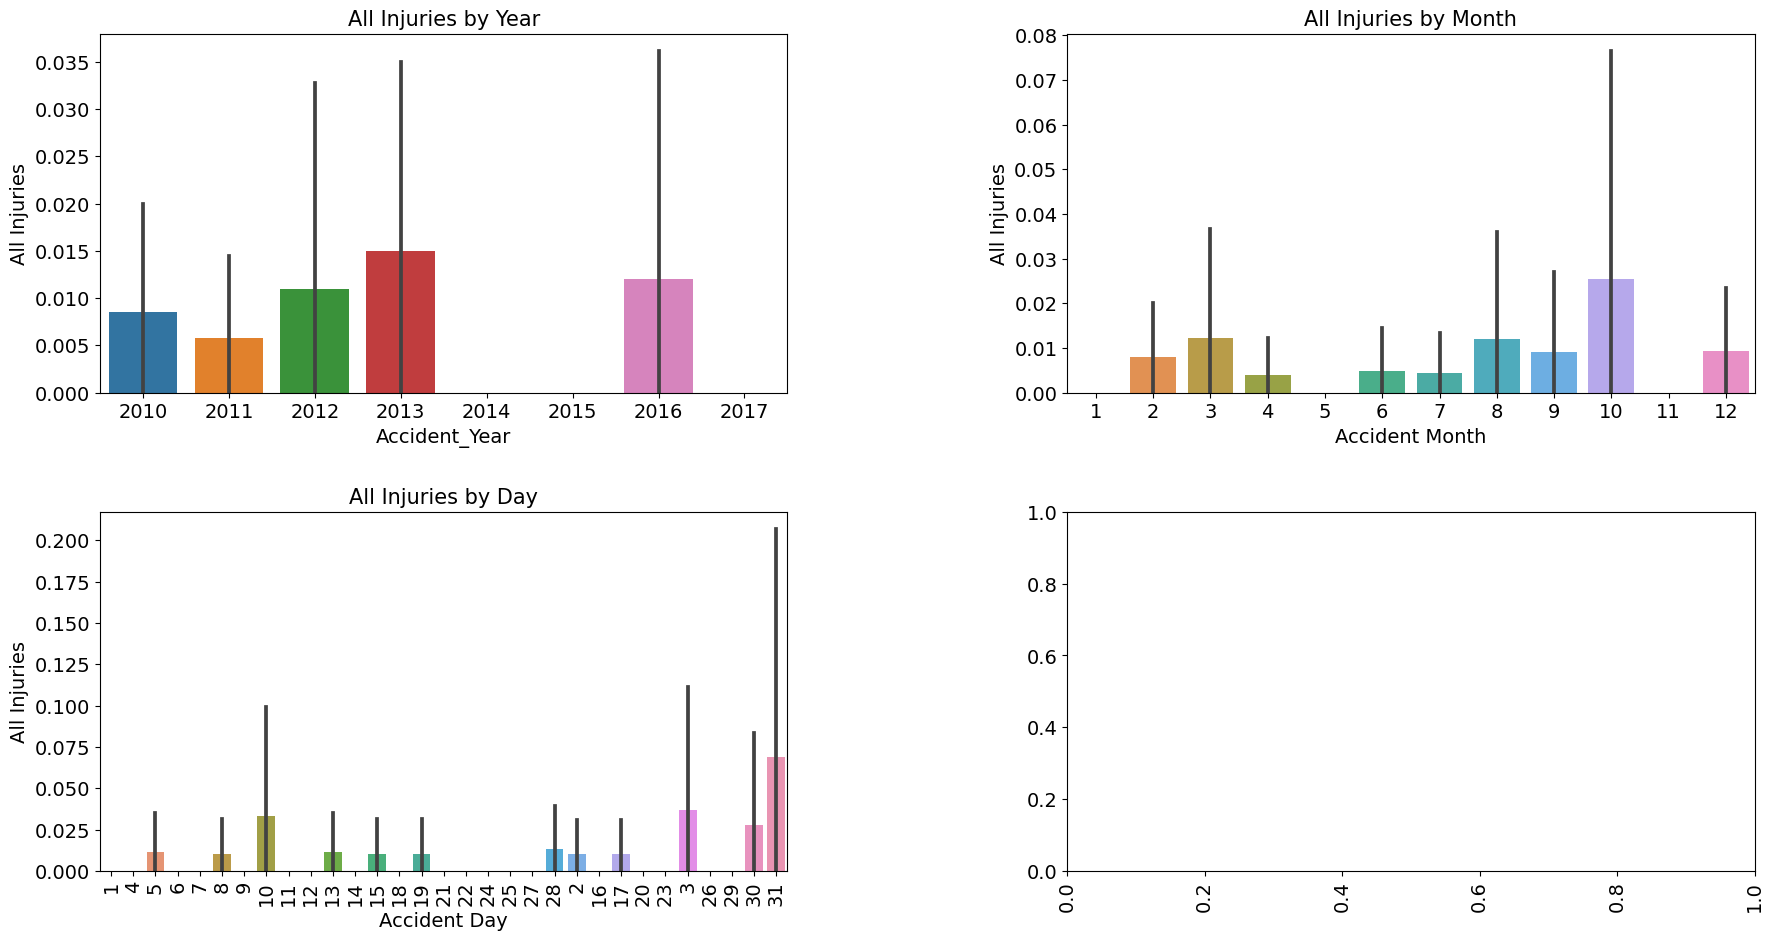

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(20, 10)

sns.barplot(x='Accident_Year', y='All Injuries', data=df1, ax=axes[0, 0])
sns.barplot(x='Accident Month', y='All Injuries', data=df1, ax=axes[0, 1])
sns.barplot(x='Accident Day', y='All Injuries', data=df1, ax=axes[1, 0])


axes[0, 0].set(title='All Injuries by Year')
axes[0, 1].set(title='All Injuries by Month')
axes[1, 0].set(title='All Injuries by Day')


axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

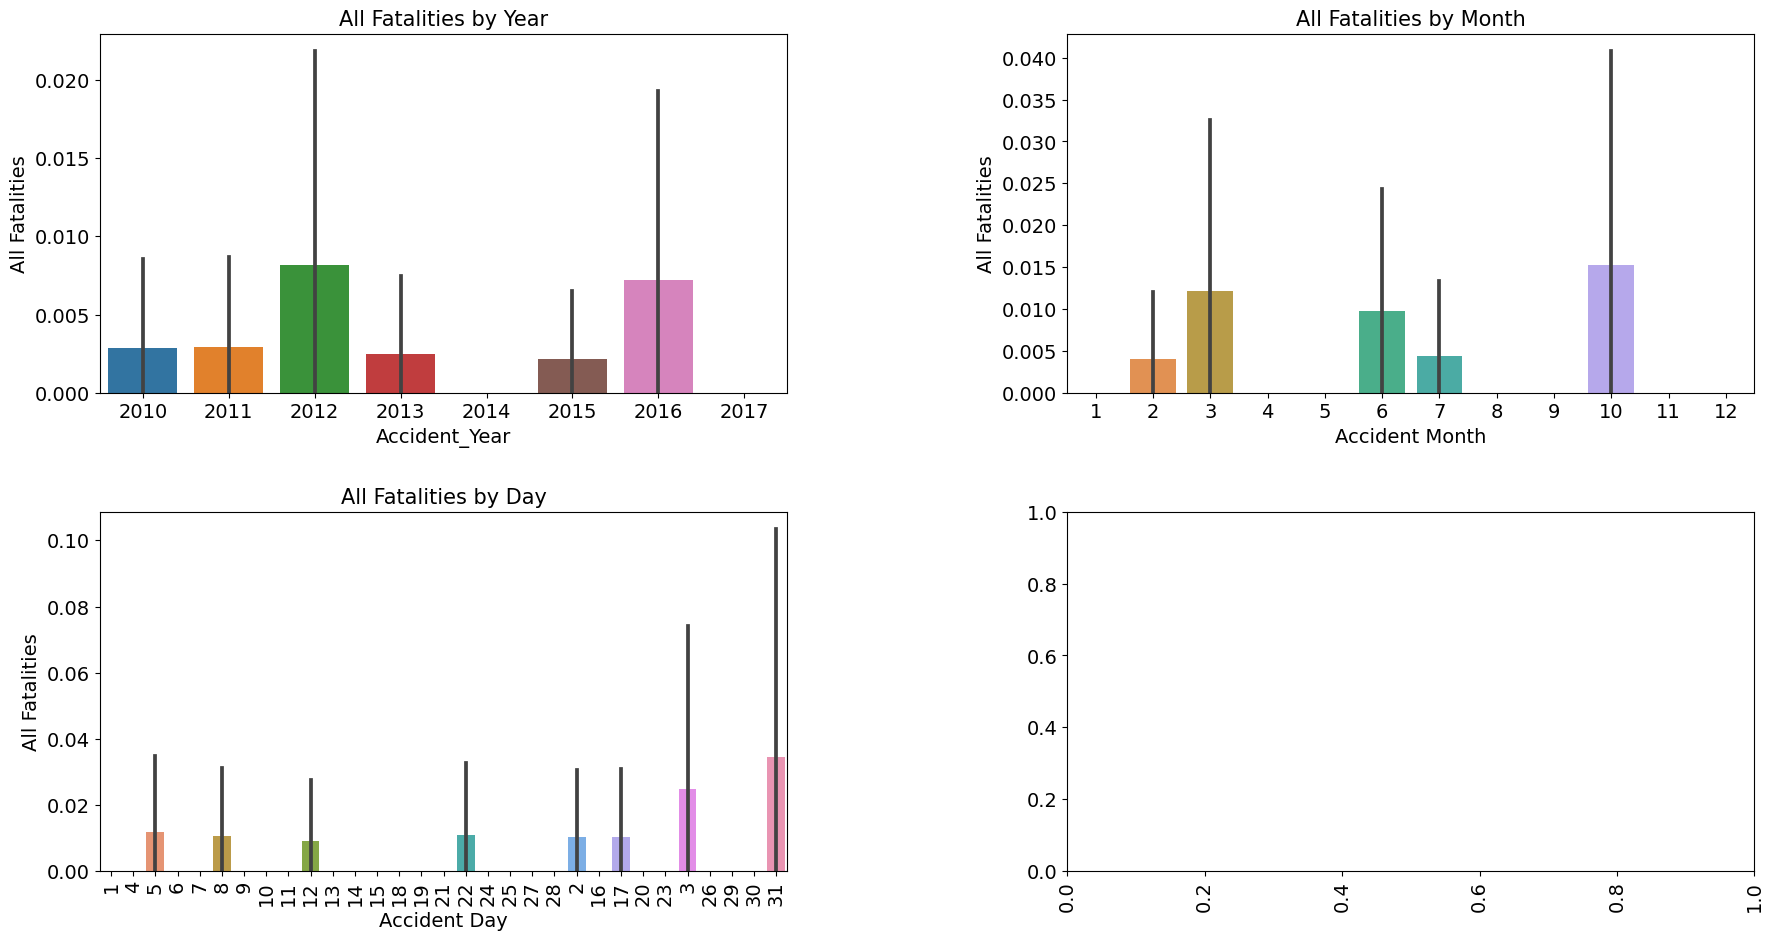

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(20, 10)

sns.barplot(x='Accident_Year', y='All Fatalities', data=df1, ax=axes[0, 0])
sns.barplot(x='Accident Month', y='All Fatalities', data=df1, ax=axes[0, 1])
sns.barplot(x='Accident Day', y='All Fatalities', data=df1, ax=axes[1, 0])


axes[0, 0].set(title='All Fatalities by Year')
axes[0, 1].set(title='All Fatalities by Month')
axes[1, 0].set(title='All Fatalities by Day')


axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

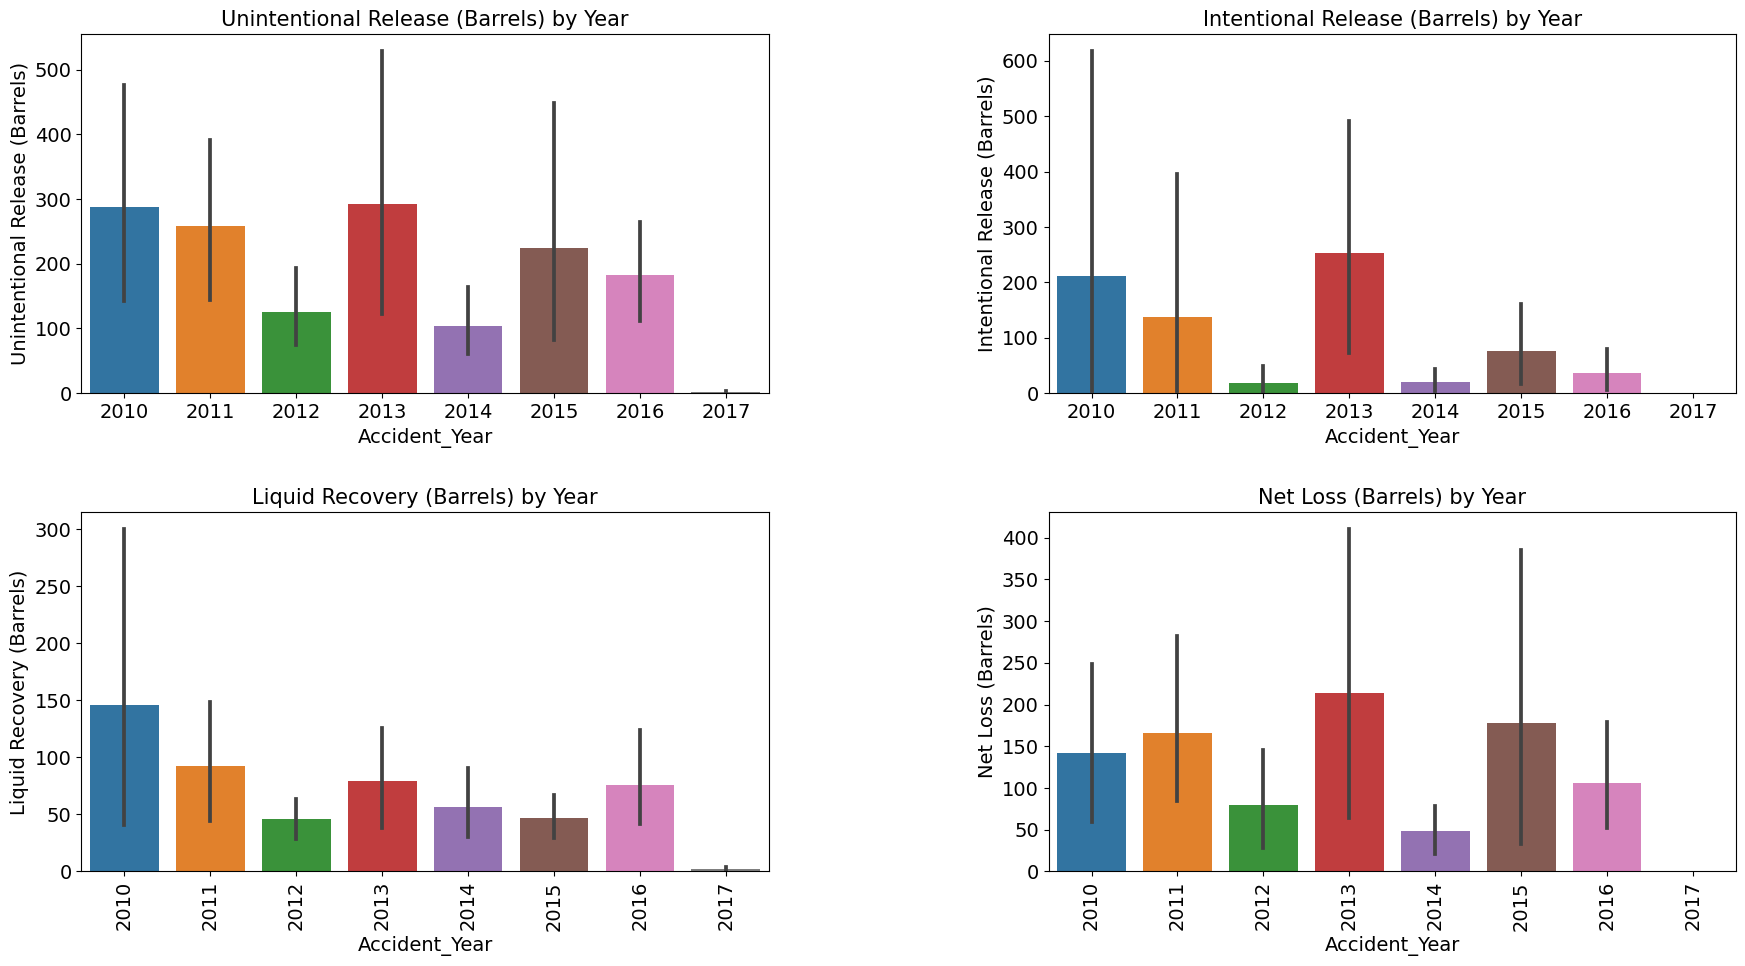

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(20, 10)

sns.barplot(x='Accident_Year', y='Unintentional Release (Barrels)', data=df1, ax=axes[0, 0])
sns.barplot(x='Accident_Year', y='Intentional Release (Barrels)', data=df1, ax=axes[0, 1])
sns.barplot(x='Accident_Year', y='Liquid Recovery (Barrels)', data=df1, ax=axes[1, 0])
sns.barplot(x='Accident_Year', y='Net Loss (Barrels)', data=df1, ax=axes[1, 1])


axes[0, 0].set(title='Unintentional Release (Barrels) by Year')
axes[0, 1].set(title='Intentional Release (Barrels) by Year')
axes[1, 0].set(title='Liquid Recovery (Barrels) by Year')
axes[1, 1].set(title='Net Loss (Barrels) by Year')


axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

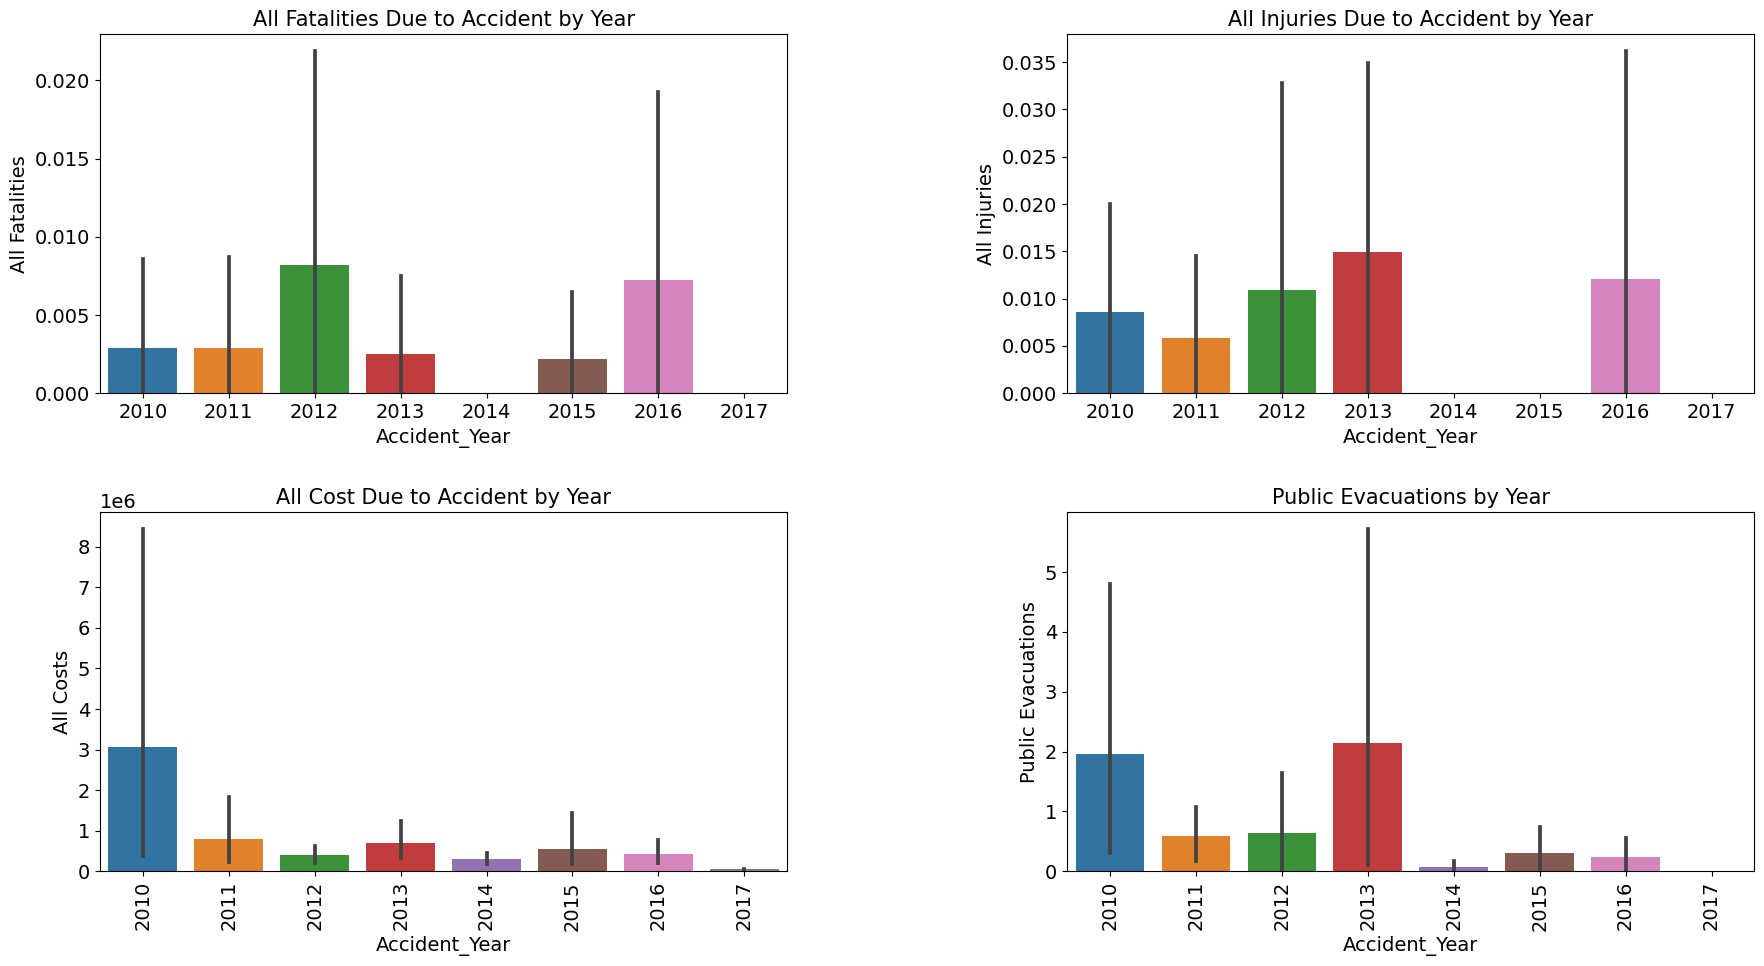

In [ ]:
# EDA-Visualization
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(20, 10)

sns.barplot(x='Accident_Year', y='All Fatalities' , data=df1, ax=axes[0, 0])
sns.barplot(x='Accident_Year', y='All Injuries', data=df1, ax=axes[0, 1])
sns.barplot(x='Accident_Year', y='All Costs', data=df1, ax=axes[1, 0])
sns.barplot(x='Accident_Year', y='Public Evacuations', data=df1, ax=axes[1, 1])


axes[0, 0].set(title='All Fatalities Due to Accident by Year')
axes[0, 1].set(title='All Injuries Due to Accident by Year')
axes[1, 0].set(title='All Cost Due to Accident by Year')
axes[1, 1].set(title='Public Evacuations by Year')


axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

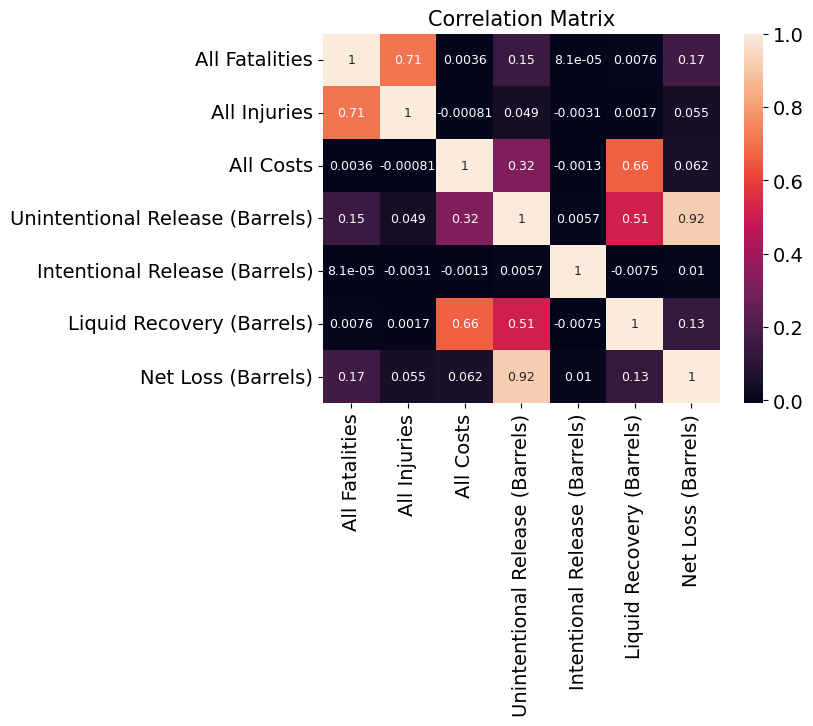

In [ ]:
cor = ['All Fatalities','All Injuries',
     'All Costs',
     'Unintentional Release (Barrels)', 'Intentional Release (Barrels)','Liquid Recovery (Barrels)',
     'Net Loss (Barrels)'

     ]
correlation_matrix = df1[cor].corr()

sns.heatmap(correlation_matrix,annot_kws = {'size':9}, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df1["Pipeline Location"].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [ ]:
df1["Pipeline Type"].value_counts()

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
0                    18
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

In [ ]:
df1["Pipeline/Facility Name"].value_counts()

0                                                 121
WYOMING PIPELINE COMPANY                           20
CUSHING TERMINAL                                   18
CORSICANA STATION                                  18
LINDEN STATION                                     15
                                                 ... 
BAY AREA PRODUCTS LINE                              1
HANNA STATION                                       1
ST. JAMES STATION                                   1
GIBSON CITY PUMP STATION- MUSTANG CRUDE SYSTEM      1
MARSHALL STATION                                    1
Name: Pipeline/Facility Name, Length: 1978, dtype: int64

In [ ]:
df1["Operator Name"].value_counts()

ENTERPRISE CRUDE PIPELINE LLC              195
SUNOCO PIPELINE L.P.                       180
PLAINS PIPELINE, L.P.                      156
ENTERPRISE PRODUCTS OPERATING LLC          155
MAGELLAN PIPELINE COMPANY, LP              140
                                          ... 
DENBURY GULF COAST PIPELINES, LLC            1
MARTIN OPERATING PARTNERSHIP, L.P.           1
PARAMOUNT PETROLEUM CORP                     1
TRI-STATES NGL PIPELINE LLC                  1
TESORO LOGISTICS NORTHWEST PIPELINE LLC      1
Name: Operator Name, Length: 229, dtype: int64

In [ ]:
df1["Accident City"].value_counts()

0             315
CUSHING        78
PASADENA       70
HOUSTON        50
MIDLAND        45
             ... 
HANKAMER        1
BROWNFIELD      1
WILSON          1
ANDOVER         1
GONZALES        1
Name: Accident City, Length: 1028, dtype: int64

In [ ]:
df1["Accident State"].value_counts()

TX    1004
OK     236
LA     169
CA     153
KS     150
IL     108
WY      98
NJ      85
MN      59
NM      57
IN      57
OH      53
ND      49
IA      46
PA      45
MO      42
MS      32
MT      30
MI      29
WI      27
CO      24
NE      22
AL      21
VA      20
GA      17
SC      16
NC      15
KY      14
NY      14
AR      13
0       12
AK      11
SD       9
MD       8
WA       8
UT       8
FL       7
TN       7
OR       4
ID       4
HI       3
WV       2
MA       2
CT       2
PR       1
NV       1
ME       1
Name: Accident State, dtype: int64

In [ ]:
df1["Cause Category"].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
NATURAL FORCE DAMAGE            118
ALL OTHER CAUSES                118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

In [ ]:
df1["Cause Subcategory"].value_counts()

INTERNAL                                             362
PUMP OR PUMP-RELATED EQUIPMENT                       296
NON-THREADED CONNECTION FAILURE                      286
EXTERNAL                                             230
OTHER EQUIPMENT FAILURE                              204
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
THREADED CONNECTION/COUPLING FAILURE                 151
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
OTHER INCORRECT OPERATION                             86
INCORRECT VALVE POSITION                              84
MISCELLANEOUS                                         76
INCORRECT INSTALLATION                                72
MANUFACTURING-RELATED                                 70
OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP                 69
FAILURE OF EQUIPMENT BODY                             67
DEFECTIVE OR LOOSE TUBING/FITTING                     62
THIRD PARTY EXCAVATION DAMAGE                         57
TEMPERATURE                    

In [ ]:
df1["Liquid Type"].value_counts()

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

In [ ]:
df1["Liquid Subtype"].value_counts()

0                                                           1446
DIESEL, FUEL OIL, KEROSENE, JET FUEL                         408
GASOLINE (NON-ETHANOL)                                       376
LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)     188
OTHER HVL                                                    171
MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)       98
ANHYDROUS AMMONIA                                             55
OTHER                                                         51
BIODIESEL                                                      2
Name: Liquid Subtype, dtype: int64

In [ ]:
df1["Liquid Name"].value_counts()

0                                           2573
PROPANE                                       26
ETHANE                                        24
Y-GRADE                                       23
ETHYLENE                                      17
                                            ... 
VACUUM GAS OIL (VGO)                           1
NAPTHA                                         1
NAPHTA                                         1
ETHANE / PROPANE                               1
98.7% ETHANE, .97% METHANE, .36% PROPANE       1
Name: Liquid Name, Length: 70, dtype: int64

#**PCA**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
Accident_dataset = 'https://drive.google.com/file/d/1f2_AX_op0puSz3xzj1HzbAQii2nrc8H4/view?usp=drive_link'
df_wdi = pd.read_csv('Accident_dataset.csv')
df_wdi.head(5)

FileNotFoundError: ignored

In [ ]:
df_wdi.rename(columns = {'Operator Name':'Operator_Name','Pipeline/Facility Name':'PipelineFacility_Name' ,'Pipeline Location':'Pipeline_Location','Pipeline Type':'Pipeline_Type','Liquid Type':'Liquid_Type','Liquid Subtype':'Liquid_Subtype','Liquid Name':'Liquid_Name','Cause Category':'Cause_Category','Cause Subcategory':'Cause_Subcategory', 'Accident City':'Accident_City','Accident State':'Accident_State','Liquid Ignition':'Liquid_Ignition','Liquid Explosion':'Liquid_Explosion','Pipeline Shutdown':'Pipeline_Shutdown' }, inplace = True)

In [ ]:
df_wdi.head(5)

In [ ]:
display(df_wdi.info())

In [ ]:
df_wdi["Liquid_Ignition"].value_counts()

In [ ]:
df_wdi["Liquid_Explosion"].value_counts()

In [ ]:
df_wdi["Pipeline_Shutdown"].value_counts()

In [ ]:
df_vals = df_wdi.drop(['Report Number', 'Supplemental Number','Accident Year','Accident Date/Time', 'Operator ID','Operator_Name','PipelineFacility_Name','Pipeline_Location', 'Pipeline_Type', 'Liquid_Type','Liquid_Subtype','Liquid_Name','Accident_City','Accident County','Accident_State','Accident Latitude', 'Accident Longitude','Cause_Category','Cause_Subcategory', 'Liquid_Ignition','Liquid_Explosion','Pipeline_Shutdown','Shutdown Date/Time','Restart Date/Time','Public Evacuations','Operator Employee Injuries','Operator Contractor Injuries', 'Emergency Responder Injuries','Other Injuries','Public Injuries'],axis=1)

In [ ]:
df_vals.head(5)

In [ ]:
df_vals = df_vals.drop(['Net Loss (Barrels)', 'All Fatalities','All Costs'],axis=1)

In [ ]:
df_vals.head(5)

In [ ]:
df_vals = df_vals.fillna(0)

In [ ]:
df_vals.head(5)

In [ ]:
# Scale data and convert back to a DataFrame
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df_vals)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = [df_vals[:0]]
df_scaled.head(5)

In [ ]:
# Run PCA on the feature set dataframe
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
principle_components = pca.fit_transform(df_scaled)

In [ ]:
df_scaled.shape

In [ ]:
principle_components.shape

**Operator_Name**

In [ ]:
#Operator_Name = df_wdi['Operator_Name'].dropna()

In [ ]:
# Stick back into a DataFrame with the original Operator_Name labels
#df_pca = pd.DataFrame(principle_components)
#df_pca = pd.concat([df_pca, pd.Series(Operator_Name.array)], axis = 1)
#df_pca.columns = ['pc1','pc2','Operator_Name']
#df_pca.head()

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
#components = pd.DataFrame(pca.components_)
#components.columns = df_vals.columns
#components

In [ ]:
# Create a new dataframe with explained variance vals for each PC
#explained_variance = pd.DataFrame({'Percentage of Explained Variances':pca.explained_variance_ratio_,
        #     'Principal Components':['PC'+ str(i) for i in range(pca.n_components_)]})
#sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance, color='.7');

**Pipeline_Location**

In [ ]:
#Pipeline_Location = df_wdi['Pipeline_Location'].dropna()

In [ ]:
# Stick back into a DataFrame with the original Pipeline_Location labels
#df_pca = pd.DataFrame(principle_components)
#df_pca = pd.concat([df_pca, pd.Series(Pipeline_Location.array)], axis = 1)
#df_pca.columns = ['pc1','pc2','Pipeline_Location']
#df_pca.head()

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
#components = pd.DataFrame(pca.components_)
#components.columns = df_vals.columns
#components

In [ ]:
# Create a new dataframe with explained variance vals for each PC
#explained_variance = pd.DataFrame({'Percentage of Explained Variances':pca.explained_variance_ratio_,
 #            'Principal Components':['PC'+ str(i) for i in range(pca.n_components_)]})
#sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance, color='.7');

**Cause_Category**

In [ ]:
Cause_Category = df_wdi['Cause_Category'].dropna()

In [ ]:
# Stick back into a DataFrame with the Cause_Category labels
df_pca = pd.DataFrame(principle_components)
df_pca_cause = pd.concat([df_pca, pd.Series(Cause_Category.array)], axis = 1)
df_pca_cause.columns = ['pc1','pc2','Cause_Category']
df_pca_cause.head()

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
components = pd.DataFrame(pca.components_)
components.columns = df_vals.columns
components

In [ ]:
# Create a new dataframe with explained variance vals for each PC
explained_variance = pd.DataFrame({'Percentage of Explained Variances':pca.explained_variance_ratio_,
             'Principal Components':['PC'+ str(i) for i in range(pca.n_components_)]})
ax = sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance, color='.7');
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause, x='pc1', y='pc2', fit_reg=False, height=18)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca.components_[0]
yvector = pca.components_[1]

# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(df_scaled)[:,0]
ys = pca.transform(df_scaled)[:,1]

# label Cause_Category
for row in range(0,df_pca_cause.shape[0]):
      plt.text(df_pca_cause.pc1[row]+0.01, df_pca_cause.pc2[row],
      df_wdi.Cause_Category[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

**Liquid_Ignition**

In [ ]:
Liquid_Ignition = df_wdi['Liquid_Ignition'].dropna()

In [ ]:
# Stick back into a DataFrame with the original Liquid_Ignition labels
df_pca = pd.DataFrame(principle_components)
df_pca_cause = pd.concat([df_pca, pd.Series(Liquid_Ignition.array)], axis = 1)
df_pca_cause.columns = ['pc1','pc2','Liquid_Ignition']
df_pca_cause.head(10)

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
components = pd.DataFrame(pca.components_)
components.columns = df_vals.columns
components

In [ ]:
# Create a new dataframe with explained variance vals for each PC
explained_variance = pd.DataFrame({'Percentage of Explained Variances':pca.explained_variance_ratio_,
             'Principal Components':['PC'+ str(i) for i in range(pca.n_components_)]})
ax = sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance, color='.7');
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause, x='pc1', y='pc2', fit_reg=False, height=18)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca.components_[0]
yvector = pca.components_[1]

# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(df_scaled)[:,0]
ys = pca.transform(df_scaled)[:,1]

# label Liquid_Ignition
for row in range(0,df_pca_cause.shape[0]):
      plt.text(df_pca_cause.pc1[row]+0.01, df_pca_cause.pc2[row],
      df_wdi.Liquid_Ignition[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

**Liquid_Explosion**

In [ ]:
Liquid_Explosion = df_wdi['Liquid_Explosion'].dropna()

In [ ]:
# Stick back into a DataFrame with the original Liquid_Explosion labels
df_pca = pd.DataFrame(principle_components)
df_pca_cause = pd.concat([df_pca, pd.Series(Liquid_Explosion.array)], axis = 1)
df_pca_cause.columns = ['pc1','pc2','Liquid_Explosion']
df_pca_cause.head()

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
components = pd.DataFrame(pca.components_)
components.columns = df_vals.columns
components

In [ ]:
#Scree plot using Seaborn
# Create a new dataframe with explained variance vals for each PC
explained_variance = pd.DataFrame({'Percentage of Explained Variances':pca.explained_variance_ratio_,
             'Principal Components':['PC'+ str(i) for i in range(pca.n_components_)]})
ax=sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance, color='.7');
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:

#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause, x='pc1', y='pc2', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca.components_[0]
yvector = pca.components_[1]

# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(df_scaled)[:,0]
ys = pca.transform(df_scaled)[:,1]

# label Liquid_Explosion
for row in range(0,df_pca_cause.shape[0]):
      plt.text(df_pca_cause.pc1[row]+0.01, df_pca_cause.pc2[row],
      df_wdi.Liquid_Explosion[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

**Pipeline_Shutdown**

In [ ]:
Pipeline_Shutdown = df_wdi['Pipeline_Shutdown'].dropna()

In [ ]:
# Stick back into a DataFrame with the original Pipeline_Shutdown labels
df_pca = pd.DataFrame(principle_components)
df_pca_cause = pd.concat([df_pca, pd.Series(Pipeline_Shutdown.array)], axis = 1)
df_pca_cause.columns = ['pc1','pc2','Pipeline_Shutdown']
df_pca_cause.head()

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
components = pd.DataFrame(pca.components_)
components.columns = df_vals.columns
components

In [ ]:
# Create a new dataframe with explained variance vals for each PC
explained_variance = pd.DataFrame({'Percentage of Explained Variances':pca.explained_variance_ratio_,
             'Principal Components':['PC'+ str(i) for i in range(pca.n_components_)]})
ax=sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance, color='.7');
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause, x='pc1', y='pc2', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca.components_[0]
yvector = pca.components_[1]

# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(df_scaled)[:,0]
ys = pca.transform(df_scaled)[:,1]

# label Pipeline_Shutdown
for row in range(0,df_pca_cause.shape[0]):
      plt.text(df_pca_cause.pc1[row]+0.01, df_pca_cause.pc2[row],
      df_wdi.Pipeline_Shutdown[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

**Pipeline_Shutdown**- **5pc**

In [ ]:
pca2 = PCA(n_components = 5)

In [ ]:
principle_component2 = pca2.fit_transform(df_scaled)

In [ ]:
principle_component2.shape

In [ ]:
# Stick back into a DataFrame with the original Pipeline_Shutdown labels
df_pca2 = pd.DataFrame(principle_component2)
df_pca_cause2 = pd.concat([df_pca2, pd.Series(Pipeline_Shutdown.array)], axis = 1)
df_pca_cause2.columns = ['pc1','pc2','pc3','pc4','pc5','Pipeline_Shutdown']
df_pca_cause2.head()

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
component2 = pd.DataFrame(pca2.components_)
component2.columns = df_vals.columns
component2

In [ ]:
# Create a new dataframe with explained variance vals for each PC
explained_variance2 = pd.DataFrame({'Percentage of Explained Variances':pca2.explained_variance_ratio_,
             'Principal Components':['PC'+ str(i) for i in range(pca2.n_components_)]})
ax=sns.barplot(x='Principal Components',y="Percentage of Explained Variances", data=explained_variance2, color='.7');
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
#pc0 and pc1
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause2, x='pc1', y='pc2', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca2.components_[0]
yvector = pca2.components_[1]

# value of the first two PCs, set the x, y axis boundary
xs = pca2.transform(df_scaled)[:,0]
ys = pca2.transform(df_scaled)[:,1]

# label Pipeline_Shutdown
for row in range(0,df_pca_cause2.shape[0]):
      plt.text(df_pca_cause2.pc1[row]+0.01, df_pca_cause2.pc2[row],
      df_wdi.Pipeline_Shutdown[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

In [ ]:
#pc1 and pc2
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause2, x='pc2', y='pc3', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca2.components_[1]
yvector = pca2.components_[2]

# value of the first two PCs, set the x, y axis boundary
xs = pca2.transform(df_scaled)[:,1]
ys = pca2.transform(df_scaled)[:,2]

# label Pipeline_Shutdown
for row in range(0,df_pca_cause2.shape[0]):
      plt.text(df_pca_cause2.pc2[row]+0.01, df_pca_cause2.pc3[row],
      df_wdi.Pipeline_Shutdown[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

In [ ]:
#pc2 and pc3
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause2, x='pc3', y='pc4', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca2.components_[2]
yvector = pca2.components_[3]

# value of the first two PCs, set the x, y axis boundary
xs = pca2.transform(df_scaled)[:,2]
ys = pca2.transform(df_scaled)[:,3]

# label Pipeline_Shutdown
for row in range(0,df_pca_cause2.shape[0]):
      plt.text(df_pca_cause2.pc3[row]+0.01, df_pca_cause2.pc4[row],
      df_wdi.Pipeline_Shutdown[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

In [ ]:
#pc3 and pc4
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause2, x='pc4', y='pc5', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca2.components_[3]
yvector = pca2.components_[4]

# value of the first two PCs, set the x, y axis boundary
xs = pca2.transform(df_scaled)[:,3]
ys = pca2.transform(df_scaled)[:,4]

# label Pipeline_Shutdown
for row in range(0,df_pca_cause2.shape[0]):
      plt.text(df_pca_cause2.pc4[row]+0.01, df_pca_cause2.pc5[row],
      df_wdi.Pipeline_Shutdown[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

In [ ]:
#pc0 and pc4
#Biplot using Seaborn
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca_cause2, x='pc5', y='pc1', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca2.components_[4]
yvector = pca2.components_[0]

# value of the first two PCs, set the x, y axis boundary
xs = pca2.transform(df_scaled)[:,4]
ys = pca2.transform(df_scaled)[:,0]

# label Pipeline_Shutdown
for row in range(0,df_pca_cause2.shape[0]):
      plt.text(df_pca_cause2.pc5[row]+0.01, df_pca_cause2.pc1[row],
      df_wdi.Pipeline_Shutdown[row], horizontalalignment='left',
      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals.columns.values)[i], color='r')

# **Classification**



classification is used when the output needs to be assigned to specific categories or classes


1.   Logistic Regression
2.   Decision Trees for Classification
1.   Random Forests
1.   Naive Bayes




---









# Logistic Regression

In [ ]:
df1.head()


,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Accident Date,Accident Month,Accident Day,Accident_Year
0,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0,MCPHERSON,MCPHERSON,...,1517.0,0.0,0.0,0.0,0.0,1627,1/1/2010,1,1,2010
1,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,RAYMOND,CUMBERLAND,...,8.0,0.0,0.0,0.0,0.0,4008,1/4/2010,1,4,2010
2,20160,"PETROLOGISTICS OLEFINS, LLC",0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,...,200.0,0.0,0.0,0.0,0.0,200,1/5/2010,1,5,2010
3,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SUPERIOR,DOUGLAS,...,40.0,0.0,11300.0,0.0,0.0,11540,1/6/2010,1,6,2010
4,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SHERMAN,GRAYSON,...,150.0,0.0,7500.0,2000.0,0.0,29650,1/7/2010,1,7,2010


In [ ]:
column_names = df1.columns.tolist()
column_names

['Operator ID',
 'Operator Name',
 'Pipeline/Facility Name',
 'Pipeline Location',
 'Pipeline Type',
 'Liquid Type',
 'Liquid Subtype',
 'Liquid Name',
 'Accident City',
 'Accident County',
 'Accident State',
 'Accident Latitude',
 'Accident Longitude',
 'Cause Category',
 'Cause Subcategory',
 'Unintentional Release (Barrels)',
 'Intentional Release (Barrels)',
 'Liquid Recovery (Barrels)',
 'Net Loss (Barrels)',
 'Liquid Ignition',
 'Liquid Explosion',
 'Pipeline Shutdown',
 'Shutdown Date/Time',
 'Restart Date/Time',
 'Public Evacuations',
 'Operator Employee Injuries',
 'Operator Contractor Injuries',
 'Emergency Responder Injuries',
 'Other Injuries',
 'Public Injuries',
 'All Injuries',
 'Operator Employee Fatalities',
 'Operator Contractor Fatalities',
 'Emergency Responder Fatalities',
 'Other Fatalities',
 'Public Fatalities',
 'All Fatalities',
 'Property Damage Costs',
 'Lost Commodity Costs',
 'Public/Private Property Damage Costs',
 'Emergency Response Costs',
 'Environmen

In [ ]:
columns_to_drop = ['Operator ID',
 'Operator Name',
 'Pipeline/Facility Name',
 'Accident City',
 'Accident County',
 'Pipeline Shutdown',
 'Shutdown Date/Time',
 'Restart Date/Time',
 'Public Evacuations',
 'Operator Employee Injuries',
 'Operator Contractor Injuries',
 'Emergency Responder Injuries',
 'Other Injuries',
 'Public Injuries',
 'All Injuries',
 'Operator Employee Fatalities',
 'Operator Contractor Fatalities',
 'Emergency Responder Fatalities',
 'Other Fatalities',
 'Public Fatalities',
 'All Fatalities',
 'Property Damage Costs',
 'Lost Commodity Costs',
 'Public/Private Property Damage Costs',
 'Emergency Response Costs',
 'Environmental Remediation Costs',
 'Other Costs',
 'All Costs',
 'id',
 'Accident Date',
 'Accident Month',
 'Accident Day',
 'Accident_Year']


Logistic = df1.drop(columns=columns_to_drop, axis=1)


In [ ]:
Logistic

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion
0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0,KS,38.670700,-97.781230,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO
1,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,ME,43.940280,-70.493360,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO
2,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,LA,30.182400,-93.352400,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO
3,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,WI,46.689300,-92.061200,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO
4,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,TX,33.582660,-96.648810,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,0.0,698.00,2.0,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,0.0,0.25,0.0,NO,NO
2791,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,"98.7% ETHANE, .97% METHANE, .36% PROPANE",LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.0,0.00,580.0,NO,NO
2792,ONSHORE,TANK,CRUDE OIL,0,0,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,0.0,1.00,0.0,NO,NO
2793,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER...,0,PA,40.631074,-80.440463,ALL OTHER CAUSES,UNKNOWN,0.20,0.0,0.20,0.0,NO,NO


In [ ]:
distinct_values = Logistic['Pipeline Type'].unique()
distinct_values

array(['ABOVEGROUND', 'UNDERGROUND', 'TANK', 0, 'TRANSITION AREA'],
      dtype=object)

In [ ]:
Logistic['Pipeline Type'] = df['Pipeline Type'].replace(0, "NULL")


In [ ]:
distinct_values = Logistic['Pipeline Type'].unique()
distinct_values

array(['ABOVEGROUND', 'UNDERGROUND', 'TANK', nan, 'TRANSITION AREA'],
      dtype=object)

In [ ]:
distinct_values = Logistic['Liquid Subtype'].unique()
distinct_values

array(['LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)', 0,
       'OTHER HVL', 'GASOLINE (NON-ETHANOL)',
       'DIESEL, FUEL OIL, KEROSENE, JET FUEL', 'ANHYDROUS AMMONIA',
       'OTHER', 'MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)',
       'BIODIESEL'], dtype=object)

In [ ]:
Logistic['Liquid Subtype'] = df['Liquid Subtype'].replace(0, "NULL")


In [ ]:
distinct_values = Logistic['Liquid Subtype'].unique()
distinct_values

array(['LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)', nan,
       'OTHER HVL', 'GASOLINE (NON-ETHANOL)',
       'DIESEL, FUEL OIL, KEROSENE, JET FUEL', 'ANHYDROUS AMMONIA',
       'OTHER', 'MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)',
       'BIODIESEL'], dtype=object)

In [ ]:
distinct_values = Logistic['Liquid Name'].unique()
distinct_values

array([0, 'ETHANE', 'NORMAL BUTANE', 'PROPYLENE', 'JET FUEL', 'RAW FEED',
       'VACUUM GAS OIL (VGO)', 'NO 6 FUEL OIL', 'PROPANE',
       'NATURAL GASOLINE', 'ISO BUTANE', 'ETHYLENE', 'ETHANE PROPANE MIX',
       'DILUTE PROPYLENE', 'LIGHT NAPHTHA (GASOLINE COMPONENT)',
       'ETHANE (80%) PROPANE (20%) MIX', 'HP PROPYLENE',
       'ETHANE/PROPANE MIX', 'Y-GRADE', 'BUTADIENE',
       'REFINERY GRADE PROPYLENE (RGP)',
       'DILUTE PROPYLENE (PROPYLENE PROPANE MIX)', 'ISOBUTANE', 'BUTANE',
       'REFINERY GRADE BUTANE', 'ULTRA LOW SULFUR DIESEL',
       'GASOLINE-DIESEL MIX', 'DILUTE PROPYLENE (PROPYLENE/PROPANE MIX)',
       'PP MIX', 'TYPE OF PRODUCT WAS NOT IDENTIFIED',
       '14# NATURAL GASOLINE', 'ISO-BUTANE', 'PROPANE/BUTANE MIX',
       'ETHANE/PROPANE BLEND', 'REFINERY GRADE BUTANE (RGB)', 'Y GRADE',
       'Y-GRADE (RAW FEED)', 'FULL RANGE NAPTHA', 'DEMETHANIZED RAW FEED',
       'NAPHTHA', 'NAPTHA', 'NAPHTA ', 'ETHANE / PROPANE',
       'ATMOSPHERIC GAS OIL', '(LCO) LIG

In [ ]:
Logistic['Liquid Name'] = df['Liquid Name'].replace(0, "NULL")


In [ ]:
distinct_values = Logistic['Accident State'].unique()
distinct_values

array(['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA',
       'IN', 'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 0, 'MO', 'NM', 'PA',
       'FL', 'VA', 'WY', 'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD',
       'AK', 'SC', 'UT', 'NE', 'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR',
       'WV', 'HI', 'MA'], dtype=object)

In [ ]:
Logistic['Accident State'] = df['Accident State'].replace(0, "NULL")


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [ ]:
# Apply Label Encoding
Logistic['Pipeline Location'] = label_encoder.fit_transform(Logistic['Pipeline Location'])
Logistic['Pipeline Type'] = label_encoder.fit_transform(Logistic['Pipeline Type'])
Logistic['Liquid Type'] = label_encoder.fit_transform(Logistic['Liquid Type'])
Logistic['Liquid Subtype'] = label_encoder.fit_transform(Logistic['Liquid Subtype'])
Logistic['Liquid Name'] = label_encoder.fit_transform(Logistic['Liquid Name'])
Logistic['Accident State'] = label_encoder.fit_transform(Logistic['Accident State'])
Logistic['Cause Category'] = label_encoder.fit_transform(Logistic['Cause Category'])
Logistic['Cause Subcategory'] = label_encoder.fit_transform(Logistic['Cause Subcategory'])
Logistic['Liquid Ignition'] = label_encoder.fit_transform(Logistic['Liquid Ignition'])
Logistic['Liquid Ignition'] = label_encoder.fit_transform(Logistic['Liquid Ignition'])
Logistic['Liquid Explosion'] = label_encoder.fit_transform(Logistic['Liquid Explosion'])



In [ ]:
Logistic

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion
0,1,0,3,4,69,13,38.670700,-97.781230,3,29,21.00,0.1,0.00,21.0,0,0
1,1,0,2,8,69,18,43.940280,-70.493360,4,32,0.12,0.0,0.12,0.0,0,0
2,1,0,3,7,16,15,30.182400,-93.352400,4,2,2.00,0.0,0.00,2.0,0,0
3,1,3,2,8,69,43,46.689300,-92.061200,5,33,0.48,0.0,0.48,0.0,0,0
4,1,3,2,8,69,39,33.582660,-96.648810,2,34,700.00,0.0,698.00,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,0,2,8,69,21,39.517036,-93.486055,4,35,0.25,0.0,0.25,0.0,0,0
2791,1,3,3,7,2,15,30.332597,-91.274491,0,36,580.00,0.0,0.00,580.0,0,0
2792,1,1,2,8,69,32,35.565292,-96.454956,4,24,1.00,0.0,1.00,0.0,0,0
2793,1,3,4,5,69,34,40.631074,-80.440463,0,36,0.20,0.0,0.20,0.0,0,0


In [ ]:
value_counts = Logistic['Liquid Explosion'].value_counts()

print("Distinct values and their counts:")
print(value_counts)

Distinct values and their counts:
0    2780
1      15
Name: Liquid Explosion, dtype: int64


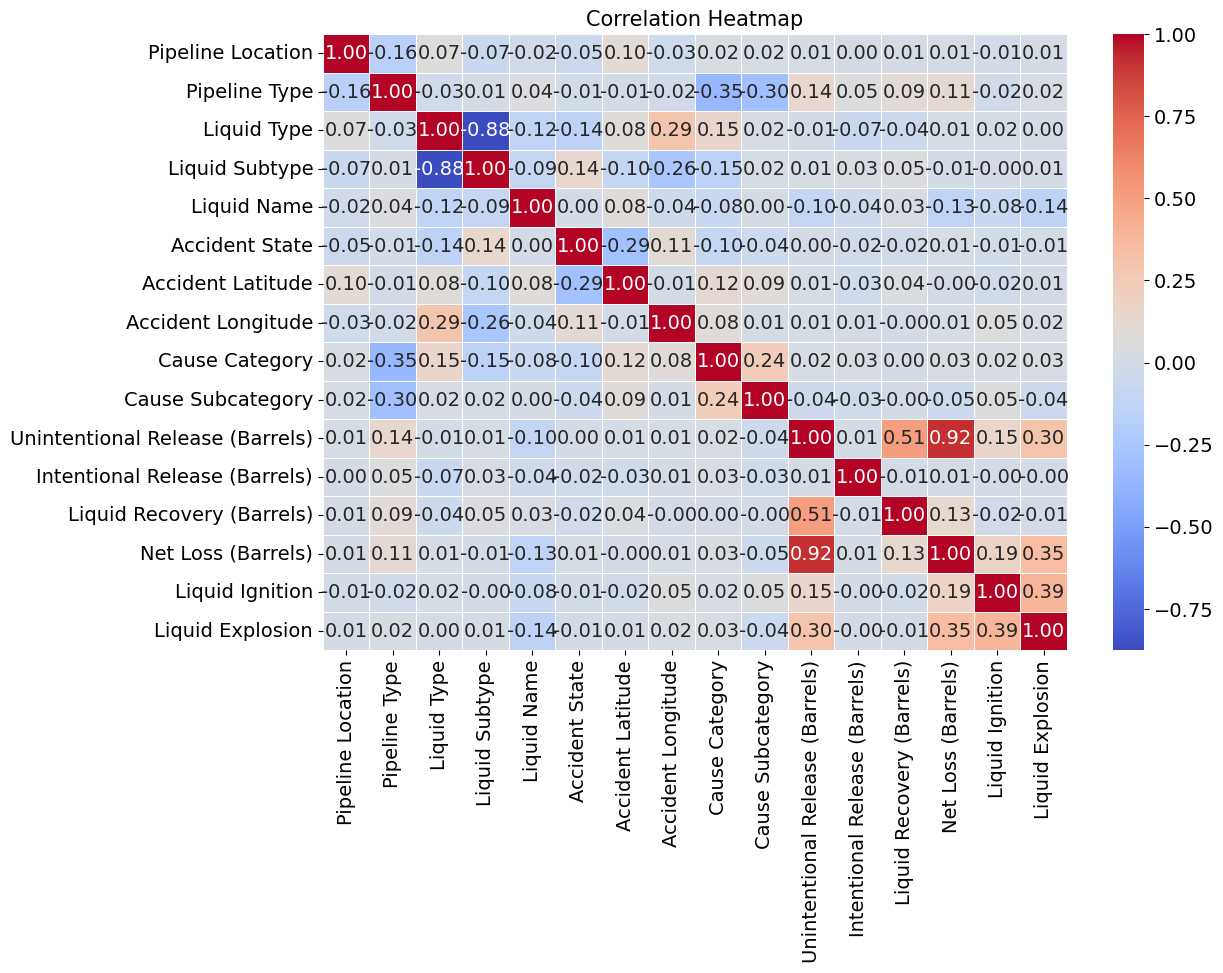

In [ ]:
correlation_matrix = Logistic.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = Logistic.drop('Liquid Explosion', axis=1)
y = Logistic['Liquid Explosion']



In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_test.value_counts()

0    556
1      3
Name: Liquid Explosion, dtype: int64

In [ ]:
# Create the logistic regression model
logistic_model = LogisticRegression()

In [ ]:
# Define the hyperparameter grid for Grid Search CV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

In [ ]:
# Create the Grid Search CV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)


In [ ]:
# Perform Grid Search CV on the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [ ]:
# Get the best hyperparameters from Grid Search CV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Get the best trained logistic regression model
best_logistic_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set using the best model
y_pred = best_logistic_model.predict(X_test)


In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


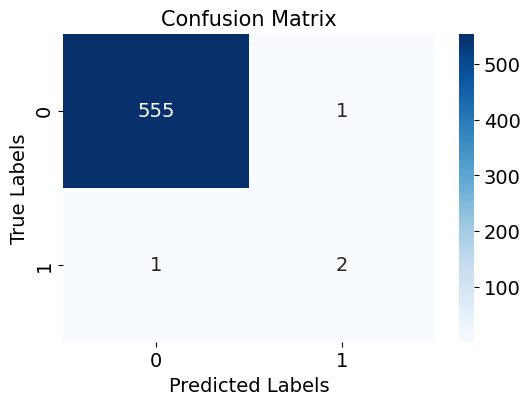

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9964221824686941
Confusion Matrix:
[[555   1]
 [  1   2]]


In [ ]:
# Make predictions on the training data
y_pred_train = best_logistic_model.predict(X_train)


In [ ]:
# Calculate the confusion matrix on the training set
cm_train = confusion_matrix(y_train, y_pred_train)

In [ ]:
# Print the confusion matrix and accuracy on the training set
print("Confusion Matrix (Training Set):")
print(cm_train)

Confusion Matrix (Training Set):
[[2224    0]
 [   2   10]]


In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on Training Set:", accuracy_train)

Accuracy on Training Set: 0.9991055456171736


# **Data Preparations for other classification**

In [ ]:
df1.head(5)

,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Accident Date,Accident Month,Accident Day,Accident_Year
0,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0,MCPHERSON,MCPHERSON,...,1517.0,0.0,0.0,0.0,0.0,1627,1/1/2010,1,1,2010
1,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,RAYMOND,CUMBERLAND,...,8.0,0.0,0.0,0.0,0.0,4008,1/4/2010,1,4,2010
2,20160,"PETROLOGISTICS OLEFINS, LLC",0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,...,200.0,0.0,0.0,0.0,0.0,200,1/5/2010,1,5,2010
3,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SUPERIOR,DOUGLAS,...,40.0,0.0,11300.0,0.0,0.0,11540,1/6/2010,1,6,2010
4,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SHERMAN,GRAYSON,...,150.0,0.0,7500.0,2000.0,0.0,29650,1/7/2010,1,7,2010


In [ ]:
#drop columns for classification
df3 = df1.drop(['Accident City','Accident County', 'Accident Latitude', 'Accident Longitude', 'Shutdown Date/Time','Restart Date/Time', 'Accident Date','Accident Month','Accident Day','Accident_Year','Pipeline/Facility Name', 'Operator Name', 'Operator ID','id','Operator Employee Injuries','Operator Contractor Injuries','Emergency Responder Injuries','Other Injuries','Public Injuries','Operator Employee Fatalities','Operator Contractor Fatalities','Emergency Responder Fatalities','Other Fatalities','Public Fatalities','Property Damage Costs','Lost Commodity Costs','Public/Private Property Damage Costs','Emergency Response Costs','Environmental Remediation Costs','Other Costs' ], axis=1)
#df3 = df1.drop(['id','Accident City','Accident County','Accident Latitude', 'Accident Longitude','Shutdown Date/Time','Restart Date/Time','All Injuries','All Fatalities','All Costs', 'Accident Date'], axis=1)

In [ ]:
# Creating a dictionary to specify the replacements for each column
replacement_dict = {'Pipeline/Facility Name': 'Unknown', 'Liquid Subtype': 'Unknown', 'Pipeline Type': 'Unknown',
                    'Liquid Type': 'Unknown', 'Liquid Name': 'Unknown', 'Accident State': 'Unknown', 'Cause Category': 'Unknown',
                    'Cause Subcategory': 'Unknown', 'Liquid Ignition': 'NO', 'Liquid Explosion': 'NO', 'Pipeline Shutdown': 'NO' }
df3 = df3.replace(0,replacement_dict)

In [ ]:
# Moving target columns to the last

df3 = df3[[col for col in df3.columns if col != 'Liquid Ignition'] + ['Liquid Ignition']]
df3 = df3[[col for col in df3.columns if col != 'Liquid Explosion'] + ['Liquid Explosion']]
df3 = df3[[col for col in df3.columns if col != 'Pipeline Shutdown'] + ['Pipeline Shutdown']]

In [ ]:
df3.head(5)

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,All Injuries,All Fatalities,All Costs,Liquid Ignition,Liquid Explosion,Pipeline Shutdown
0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,Unknown,KS,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,0.0,0.0,0.0,1627,NO,NO,NO
1,ONSHORE,ABOVEGROUND,CRUDE OIL,Unknown,Unknown,ME,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,0.0,0.0,0.0,4008,NO,NO,NO
2,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,LA,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,0.0,0.0,0.0,200,NO,NO,NO
3,ONSHORE,UNDERGROUND,CRUDE OIL,Unknown,Unknown,WI,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,0.0,0.0,0.0,11540,NO,NO,NO
4,ONSHORE,UNDERGROUND,CRUDE OIL,Unknown,Unknown,TX,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,0.0,698.00,2.0,0.0,0.0,0.0,29650,NO,NO,NO


In [ ]:
display(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pipeline Location                2795 non-null   object 
 1   Pipeline Type                    2795 non-null   object 
 2   Liquid Type                      2795 non-null   object 
 3   Liquid Subtype                   2795 non-null   object 
 4   Liquid Name                      2795 non-null   object 
 5   Accident State                   2795 non-null   object 
 6   Cause Category                   2795 non-null   object 
 7   Cause Subcategory                2795 non-null   object 
 8   Unintentional Release (Barrels)  2795 non-null   float64
 9   Intentional Release (Barrels)    2795 non-null   float64
 10  Liquid Recovery (Barrels)        2795 non-null   float64
 11  Net Loss (Barrels)               2795 non-null   float64
 12  Public Evacuations  

None

In [ ]:
df3["Liquid Ignition"].value_counts()

NO     2700
YES      95
Name: Liquid Ignition, dtype: int64

In [ ]:
df3["Liquid Explosion"].value_counts()

NO     2780
YES      15
Name: Liquid Explosion, dtype: int64

In [ ]:
df3["Pipeline Shutdown"].value_counts()

NO     1400
YES    1395
Name: Pipeline Shutdown, dtype: int64

# **Train test split for classification**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separate features and targets

x = df3.drop(columns=['Liquid Ignition', 'Liquid Explosion', 'Pipeline Shutdown'])
y_Ignition = df3['Liquid Ignition']
y_Explosion = df3['Liquid Explosion']
y_Shutdown = df3['Pipeline Shutdown']

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
from matplotlib.font_manager import X11FontDirectories
# Apply Label Encoding
x['Pipeline Location'] = label_encoder.fit_transform(X1['Pipeline Location'])
x['Pipeline Type'] = label_encoder.fit_transform(X1['Pipeline Type'])
x['Liquid Type'] = label_encoder.fit_transform(X1['Liquid Type'])
x['Liquid Subtype'] = label_encoder.fit_transform(X1['Liquid Subtype'])
x['Liquid Name'] = label_encoder.fit_transform(X1['Liquid Name'])
x['Accident State'] = label_encoder.fit_transform(X1['Accident State'])
x['Cause Category'] = label_encoder.fit_transform(X1['Cause Category'])
x['Cause Subcategory'] = label_encoder.fit_transform(X1['Cause Subcategory'])

In [ ]:
x

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,All Injuries,All Fatalities,All Costs
0,1,0,3,4,63,13,3,29,21.00,0.1,0.00,21.0,0.0,0.0,0.0,1627
1,1,0,2,8,63,18,4,32,0.12,0.0,0.12,0.0,0.0,0.0,0.0,4008
2,1,0,3,7,16,15,4,2,2.00,0.0,0.00,2.0,0.0,0.0,0.0,200
3,1,3,2,8,63,44,5,33,0.48,0.0,0.48,0.0,0.0,0.0,0.0,11540
4,1,3,2,8,63,39,2,34,700.00,0.0,698.00,2.0,0.0,0.0,0.0,29650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,0,2,8,63,21,4,35,0.25,0.0,0.25,0.0,0.0,0.0,0.0,61015
2791,1,3,3,7,2,15,0,36,580.00,0.0,0.00,580.0,0.0,0.0,0.0,105400
2792,1,1,2,8,63,32,4,24,1.00,0.0,1.00,0.0,0.0,0.0,0.0,15050
2793,1,3,4,5,63,34,0,36,0.20,0.0,0.20,0.0,0.0,0.0,0.0,41428


In [ ]:
# Split the data into training and testing sets for each target column
x_train, x_test, y_train_Ignition, y_test_Ignition = train_test_split(x, y_Ignition, test_size=0.2, random_state=42)
x_train, x_test, y_train_Explosion, y_test_Explosion = train_test_split(x, y_Explosion, test_size=0.2, random_state=42)
x_train, x_test, y_train_Shutdown, y_test_Shutdown = train_test_split(x, y_Shutdown, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# **Feature Importances with Decision Tree**

                            Feature  Importance
8   Unintentional Release (Barrels)    0.270005
15                        All Costs    0.212636
10        Liquid Recovery (Barrels)    0.073476
9     Intentional Release (Barrels)    0.059054
6                    Cause Category    0.057636
5                    Accident State    0.055619
7                 Cause Subcategory    0.052740
11               Net Loss (Barrels)    0.052178
3                    Liquid Subtype    0.051566
14                   All Fatalities    0.040328
4                       Liquid Name    0.032755
1                     Pipeline Type    0.018851
2                       Liquid Type    0.011664
13                     All Injuries    0.011492
0                 Pipeline Location    0.000000
12               Public Evacuations    0.000000


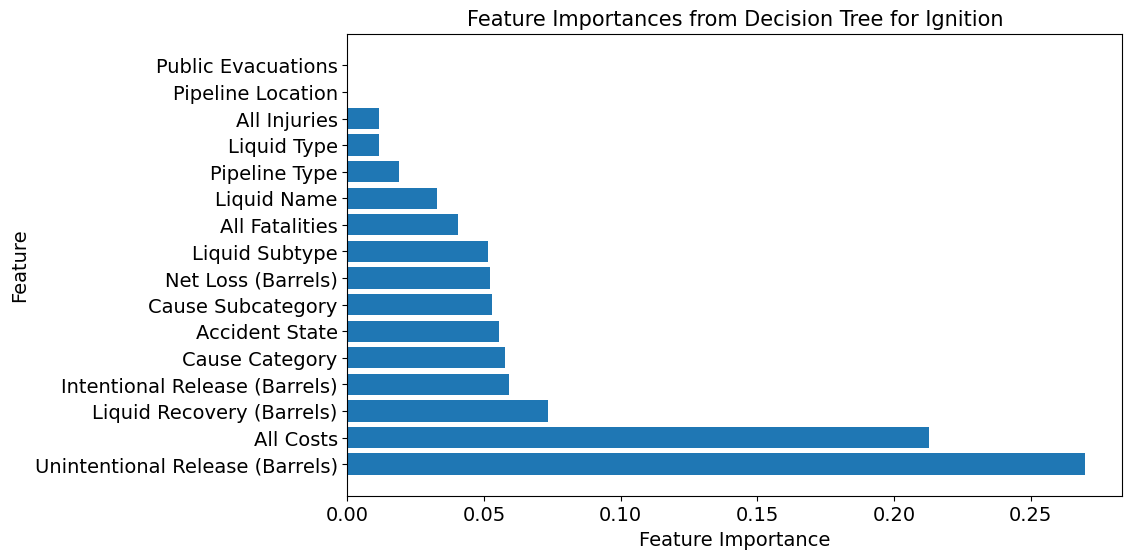

In [ ]:
# Ignition

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train_Ignition)

# Get feature importances from the classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame with feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree for Ignition')
plt.show()

                            Feature  Importance
11               Net Loss (Barrels)    0.224467
15                        All Costs    0.202360
4                       Liquid Name    0.136001
5                    Accident State    0.120746
9     Intentional Release (Barrels)    0.085037
10        Liquid Recovery (Barrels)    0.076427
7                 Cause Subcategory    0.049158
2                       Liquid Type    0.041891
14                   All Fatalities    0.031736
8   Unintentional Release (Barrels)    0.029477
12               Public Evacuations    0.002700
0                 Pipeline Location    0.000000
1                     Pipeline Type    0.000000
3                    Liquid Subtype    0.000000
6                    Cause Category    0.000000
13                     All Injuries    0.000000


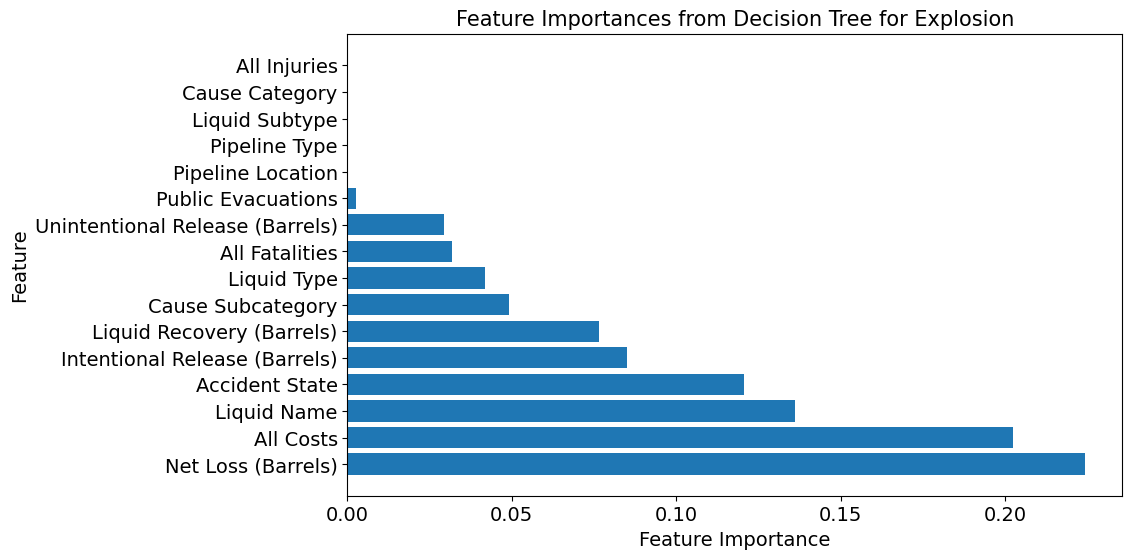

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train_Explosion)

# Get feature importances from the classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame with feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree for Explosion')
plt.show()

                            Feature  Importance
15                        All Costs    0.254942
8   Unintentional Release (Barrels)    0.171946
7                 Cause Subcategory    0.121109
10        Liquid Recovery (Barrels)    0.105783
5                    Accident State    0.101494
11               Net Loss (Barrels)    0.052966
1                     Pipeline Type    0.049189
6                    Cause Category    0.044203
3                    Liquid Subtype    0.043498
4                       Liquid Name    0.022766
9     Intentional Release (Barrels)    0.017105
2                       Liquid Type    0.013041
12               Public Evacuations    0.001187
14                   All Fatalities    0.000770
0                 Pipeline Location    0.000000
13                     All Injuries    0.000000


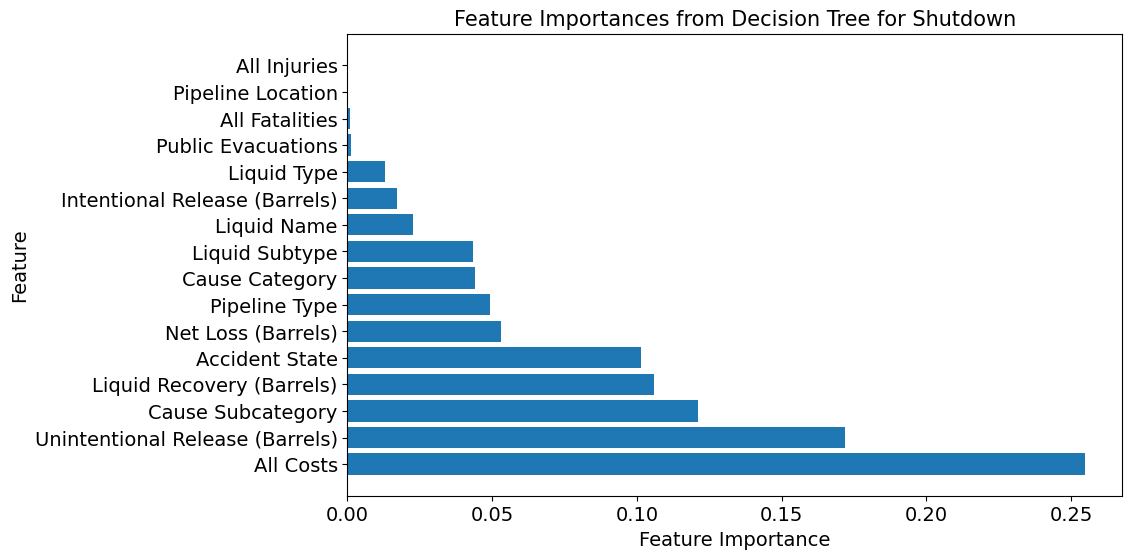

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train_Shutdown)

# Get feature importances from the classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame with feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree for Shutdown')
plt.show()

# **Decision Trees for Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

classifier_Ignition_tree = DecisionTreeClassifier(random_state=42)
classifier_Explosion_tree = DecisionTreeClassifier(random_state=42)
classifier_Shutdown_tree = DecisionTreeClassifier(random_state=42)

**Hyperparameter tuning of Decision Tree for Ignition**

In [ ]:
# Define the hyperparameters and their possible values for tuning
param_grid_tree = {
    'criterion': ['gini', 'entropy'],    # Criterion for splitting ('gini' or 'entropy')
    'max_depth': [None, 5, 10, 15],      # Maximum depth of the tree (None means no maximum depth)
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Ignition_tree = GridSearchCV(classifier_Ignition_tree, param_grid_tree, cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Ignition_tree.fit(x_train, y_train_Ignition)

# Get the best hyperparameters and the best model
best_params_Ignition_tree = grid_search_Ignition_tree.best_params_
best_dt_classifier_Ignition_tree = grid_search_Ignition_tree.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Ignition_tree)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Ignition_tree = best_dt_classifier_Ignition_tree.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_Ignition_tree = accuracy_score(y_test_Ignition, y_pred_Ignition_tree)
print("Best Model Accuracy for Ignition with Decision Tree:", accuracy_Ignition_tree)

Best Model Accuracy for Ignition with Decision Tree: 0.9677996422182469


**Hyperparameter tuning of Decision Tree for Explosion**

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Explosion_tree = GridSearchCV(classifier_Explosion_tree, param_grid_tree, cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Explosion_tree.fit(x_train, y_train_Explosion)

# Get the best hyperparameters and the best model
best_params_Explosion_tree = grid_search_Explosion_tree.best_params_
best_dt_classifier_Explosion_tree = grid_search_Explosion_tree.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Explosion_tree)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Explosion_tree = best_dt_classifier_Explosion_tree.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_Explosion_tree = accuracy_score(y_test_Explosion, y_pred_Explosion_tree)
print("Best Model Accuracy for Explosion with Decision Tree:", accuracy_Explosion_tree)

Best Model Accuracy for Explosion with Decision Tree: 0.9874776386404294


**Hyperparameter tuning of Decision Tree for Shutdown**

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Shutdown_tree = GridSearchCV(classifier_Shutdown_tree, param_grid_tree, cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Shutdown_tree.fit(x_train, y_train_Shutdown)

# Get the best hyperparameters and the best model
best_params_Shutdown_tree = grid_search_Shutdown_tree.best_params_
best_dt_classifier_Shutdown_tree = grid_search_Shutdown_tree.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Shutdown_tree)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Shutdown_tree = best_dt_classifier_Shutdown_tree.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_Shutdown_tree = accuracy_score(y_test_Shutdown, y_pred_Shutdown_tree)
print("Best Model Accuracy for Shutdown with Decision Tree:", accuracy_Shutdown_tree)

Best Model Accuracy for Shutdown with Decision Tree: 0.592128801431127


Other results format

In [ ]:
print("Classification Report for Liquid Ignition with Decision Tree:")
print(classification_report(y_test_Ignition, y_pred_Ignition_tree))

Classification Report for Liquid Ignition with Decision Tree:
              precision    recall  f1-score   support

          NO       0.98      0.98      0.98       543
         YES       0.44      0.44      0.44        16

    accuracy                           0.97       559
   macro avg       0.71      0.71      0.71       559
weighted avg       0.97      0.97      0.97       559



In [ ]:
print("Classification Report for Liquid Explosion with Decision Tree:")
print(classification_report(y_test_Explosion, y_pred_Explosion_tree))

Classification Report for Liquid Explosion with Decision Tree:
              precision    recall  f1-score   support

          NO       0.99      0.99      0.99       556
         YES       0.00      0.00      0.00         3

    accuracy                           0.99       559
   macro avg       0.50      0.50      0.50       559
weighted avg       0.99      0.99      0.99       559



In [ ]:
print("Classification Report for Pipeline Shutdown with Decision Tree:")
print(classification_report(y_test_Shutdown, y_pred_Shutdown_tree))

Classification Report for Pipeline Shutdown with Decision Tree:
              precision    recall  f1-score   support

          NO       0.58      0.67      0.62       279
         YES       0.61      0.51      0.56       280

    accuracy                           0.59       559
   macro avg       0.59      0.59      0.59       559
weighted avg       0.59      0.59      0.59       559



In [ ]:
#confusion matrix for each classifier
conf_matrix_Ignition_tree = confusion_matrix(y_test_Ignition, y_pred_Ignition_tree)
conf_matrix_Explosion_tree = confusion_matrix(y_test_Explosion, y_pred_Explosion_tree)
conf_matrix_Shutdown_tree = confusion_matrix(y_test_Shutdown, y_pred_Shutdown_tree)

In [ ]:
print("Confusion Matrix for Liquid Ignition with Decision Tree:")
print(conf_matrix_Ignition_tree)

Confusion Matrix for Liquid Ignition with Decision Tree:
[[534   9]
 [  9   7]]


In [ ]:
print("Confusion Matrix for Liquid Explosion with Decision Tree:")
print(conf_matrix_Explosion_tree)

Confusion Matrix for Liquid Explosion with Decision Tree:
[[552   4]
 [  3   0]]


In [ ]:
print("Confusion Matrix for Pipeline Shutdown with Decision Tree:")
print(conf_matrix_Shutdown_tree)

Confusion Matrix for Pipeline Shutdown with Decision Tree:
[[188  91]
 [137 143]]


# **Random Forests Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier_Ignition_rand = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_Explosion_rand = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_Shutdown_rand = RandomForestClassifier(n_estimators=100, random_state=42)

**Hyperparameter tuning of Random Forest for Ignition**

In [ ]:
# Define the hyperparameters and their possible values for tuning
param_grid_rand = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'criterion': ['gini', 'entropy'],       # Criterion for splitting ('gini' or 'entropy')
    'max_depth': [None, 5, 10, 15],         # Maximum depth of the tree (None means no maximum depth)
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Ignition_rand = GridSearchCV(classifier_Ignition_rand, param_grid_rand, cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Ignition_rand.fit(x_train, y_train_Ignition)

# Get the best hyperparameters and the best model
best_params_Ignition_rand = grid_search_Ignition_rand.best_params_
best_rf_classifier_Ignition_rand = grid_search_Ignition_rand.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Ignition_rand)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Ignition_rand = best_rf_classifier_Ignition_rand.predict(x_test)

In [ ]:
# Calculate and print the accuracy of the best model
accuracy_Ignition_rand = accuracy_score(y_test_Ignition, y_pred_Ignition_rand)
print("Best Model Accuracy for Ignition with Random Forest:", accuracy_Ignition_rand)

Best Model Accuracy for Ignition with Random Forest: 0.9785330948121646


**Hyperparameter tuning of Random Forest for Explosion**

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Explosion_rand = GridSearchCV(classifier_Explosion_rand, param_grid_rand, cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Explosion_rand.fit(x_train, y_train_Explosion)

# Get the best hyperparameters and the best model
best_params_Explosion_rand = grid_search_Explosion_rand.best_params_
best_rf_classifier_Explosion = grid_search_Explosion_rand.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Explosion_rand)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Explosion_rand = best_rf_classifier_Explosion.predict(x_test)

In [ ]:
# Calculate and print the accuracy of the best model
accuracy_Explosion_rand = accuracy_score(y_test_Explosion, y_pred_Explosion_rand)
print("Best Model Accuracy for Explosion with Random Forest:", accuracy_Explosion_rand)

Best Model Accuracy for Explosion with Random Forest: 0.9946332737030411


**Hyperparameter tuning of Random Forest for Shutdown**

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Shutdown_rand = GridSearchCV(classifier_Shutdown_rand, param_grid_rand, cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Shutdown_rand.fit(x_train, y_train_Shutdown)

# Get the best hyperparameters and the best model
best_params_Shutdown_rand = grid_search_Shutdown_rand.best_params_
best_rf_classifier_Shutdown = grid_search_Shutdown_rand.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Shutdown_rand)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Shutdown_rand = best_rf_classifier_Shutdown.predict(x_test)

In [ ]:
# Calculate and print the accuracy of the best model
accuracy_Shutdown_rand = accuracy_score(y_test_Shutdown, y_pred_Shutdown_rand)
print("Best Model Accuracy for Shutdown with Random Forest:", accuracy_Shutdown_rand)

Best Model Accuracy for Shutdown with Random Forest: 0.6708407871198568


In [ ]:
print("Classification Report for Liquid Ignition with Random Forest:")
print(classification_report(y_test_Ignition, y_pred_Ignition_rand))

Classification Report for Liquid Ignition with Random Forest:
              precision    recall  f1-score   support

          NO       0.99      0.99      0.99       543
         YES       0.67      0.50      0.57        16

    accuracy                           0.98       559
   macro avg       0.83      0.75      0.78       559
weighted avg       0.98      0.98      0.98       559



In [ ]:
print("Classification Report for Liquid Explosion with Random Forest:")
print(classification_report(y_test_Explosion, y_pred_Explosion_rand))

Classification Report for Liquid Explosion with Random Forest:
              precision    recall  f1-score   support

          NO       0.99      1.00      1.00       556
         YES       0.00      0.00      0.00         3

    accuracy                           0.99       559
   macro avg       0.50      0.50      0.50       559
weighted avg       0.99      0.99      0.99       559



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Classification Report for Pipeline Shutdown with Random Forest:")
print(classification_report(y_test_Shutdown, y_pred_Shutdown_rand))

Classification Report for Pipeline Shutdown with Random Forest:
              precision    recall  f1-score   support

          NO       0.65      0.72      0.69       279
         YES       0.69      0.62      0.65       280

    accuracy                           0.67       559
   macro avg       0.67      0.67      0.67       559
weighted avg       0.67      0.67      0.67       559



In [ ]:
#confusion matrix for each classifier
conf_matrix_Ignition_rand = confusion_matrix(y_test_Ignition, y_pred_Ignition_rand)
conf_matrix_Explosion_rand = confusion_matrix(y_test_Explosion, y_pred_Explosion_rand)
conf_matrix_Shutdown_rand = confusion_matrix(y_test_Shutdown, y_pred_Shutdown_rand)

In [ ]:
print("Confusion Matrix for Liquid Ignition with Random Forest:")
print(conf_matrix_Ignition_rand)

Confusion Matrix for Liquid Ignition with Random Forest:
[[539   4]
 [  8   8]]


In [ ]:
print("Confusion Matrix for Liquid Explosion with Random Forest:")
print(conf_matrix_Explosion_rand)

Confusion Matrix for Liquid Explosion with Random Forest:
[[556   0]
 [  3   0]]


In [ ]:
print("Confusion Matrix for Pipeline Shutdown with Random Forest:")
print(conf_matrix_Shutdown_rand)

Confusion Matrix for Pipeline Shutdown with Random Forest:
[[201  78]
 [106 174]]


# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

classifier_Ignition_nb = GaussianNB()
classifier_Explosion_nb = GaussianNB()
classifier_Shutdown_nb = GaussianNB()

**Hyperparameter tuning of Naive Bayes for Ignition**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]  # Smoothing parameter for variance estimation
}

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Ignition_nb = GridSearchCV(classifier_Ignition_nb, param_grid_nb , cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Ignition_nb.fit(x_train, y_train_Ignition)

# Get the best hyperparameters and the best model
best_params_Ignition_nb = grid_search_Ignition_nb.best_params_
best_nb_classifier_Ignition_nb = grid_search_Ignition_nb.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Ignition_nb )

Best Hyperparameters:
{'var_smoothing': 1e-05}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Ignition_nb = best_nb_classifier_Ignition_nb.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_Ignition_nb = accuracy_score(y_test_Ignition, y_pred_Ignition_nb)
print("Best Model Accuracy for Ignition with Naive Bayes:", accuracy_Ignition_nb)

Best Model Accuracy for Ignition with Naive Bayes: 0.9713774597495528


**Hyperparameter tuning of Naive Bayes for Explosion**

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Explosion_nb = GridSearchCV(classifier_Explosion_nb, param_grid_nb , cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Explosion_nb.fit(x_train, y_train_Explosion)

# Get the best hyperparameters and the best model
best_params_Explosion_nb = grid_search_Explosion_nb.best_params_
best_nb_classifier_Explosion_nb = grid_search_Explosion_nb.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Explosion_nb )

Best Hyperparameters:
{'var_smoothing': 1e-05}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Explosion_nb = best_nb_classifier_Explosion_nb.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_Explosion_nb = accuracy_score(y_test_Explosion, y_pred_Explosion_nb)
print("Best Model Accuracy for Explosion with Naive Bayes:", accuracy_Explosion_nb)

Best Model Accuracy for Explosion with Naive Bayes: 0.9946332737030411


**Hyperparameter tuning of Naive Bayes for Shutdown**

In [ ]:
# Create GridSearchCV to find the best hyperparameters
grid_search_Shutdown_nb = GridSearchCV(classifier_Shutdown_nb, param_grid_nb , cv=5, scoring='accuracy')

# Perform the Grid Search with cross-validation
grid_search_Shutdown_nb.fit(x_train, y_train_Shutdown)

# Get the best hyperparameters and the best model
best_params_Shutdown_nb = grid_search_Shutdown_nb.best_params_
best_nb_classifier_Shutdown_nb = grid_search_Shutdown_nb.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_Shutdown_nb )

Best Hyperparameters:
{'var_smoothing': 1e-08}


In [ ]:
# Make predictions with the best model on the test set
y_pred_Shutdown_nb = best_nb_classifier_Shutdown_nb.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy_Shutdown_nb = accuracy_score(y_test_Shutdown, y_pred_Shutdown_nb)
print("Best Model Accuracy for Shutdown with Naive Bayes:", accuracy_Shutdown_nb)

Best Model Accuracy for Shutdown with Naive Bayes: 0.5330948121645797


In [ ]:
print("Classification Report for Liquid Ignition with Naive Bayes:")
print(classification_report(y_test_Ignition, y_pred_Ignition_nb))

Classification Report for Liquid Ignition with Naive Bayes:
              precision    recall  f1-score   support

          NO       0.97      1.00      0.99       543
         YES       0.00      0.00      0.00        16

    accuracy                           0.97       559
   macro avg       0.49      0.50      0.49       559
weighted avg       0.94      0.97      0.96       559



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Classification Report for Liquid Explosion with Naive Bayes:")
print(classification_report(y_test_Explosion, y_pred_Explosion_nb))

Classification Report for Liquid Explosion with Naive Bayes:
              precision    recall  f1-score   support

          NO       0.99      1.00      1.00       556
         YES       0.00      0.00      0.00         3

    accuracy                           0.99       559
   macro avg       0.50      0.50      0.50       559
weighted avg       0.99      0.99      0.99       559



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Classification Report for Pipeline Shutdown with Naive Bayes:")
print(classification_report(y_test_Shutdown, y_pred_Shutdown_nb))

Classification Report for Pipeline Shutdown with Naive Bayes:
              precision    recall  f1-score   support

          NO       0.52      0.98      0.68       279
         YES       0.83      0.09      0.16       280

    accuracy                           0.53       559
   macro avg       0.67      0.53      0.42       559
weighted avg       0.67      0.53      0.42       559



In [ ]:
#confusion matrix for each classifier
conf_matrix_Ignition = confusion_matrix(y_test_Ignition, y_pred_Ignition_nb)
conf_matrix_Explosion = confusion_matrix(y_test_Explosion, y_pred_Explosion_nb)
conf_matrix_Shutdown = confusion_matrix(y_test_Shutdown, y_pred_Shutdown_nb)

In [ ]:
print("Confusion Matrix for Liquid Ignition with Naive Bayes:")
print(conf_matrix_Ignition)

Confusion Matrix for Liquid Ignition with Naive Bayes:
[[543   0]
 [ 16   0]]


In [ ]:
print("Confusion Matrix for Liquid Explosion with Naive Bayes:")
print(conf_matrix_Explosion)

Confusion Matrix for Liquid Explosion with Naive Bayes:
[[556   0]
 [  3   0]]


In [ ]:
print("Confusion Matrix for Pipeline Shutdown with Naive Bayes:")
print(conf_matrix_Shutdown)

Confusion Matrix for Pipeline Shutdown with Naive Bayes:
[[274   5]
 [256  24]]


# ***Graphs to compare results***

# ***Liquid Ignition***

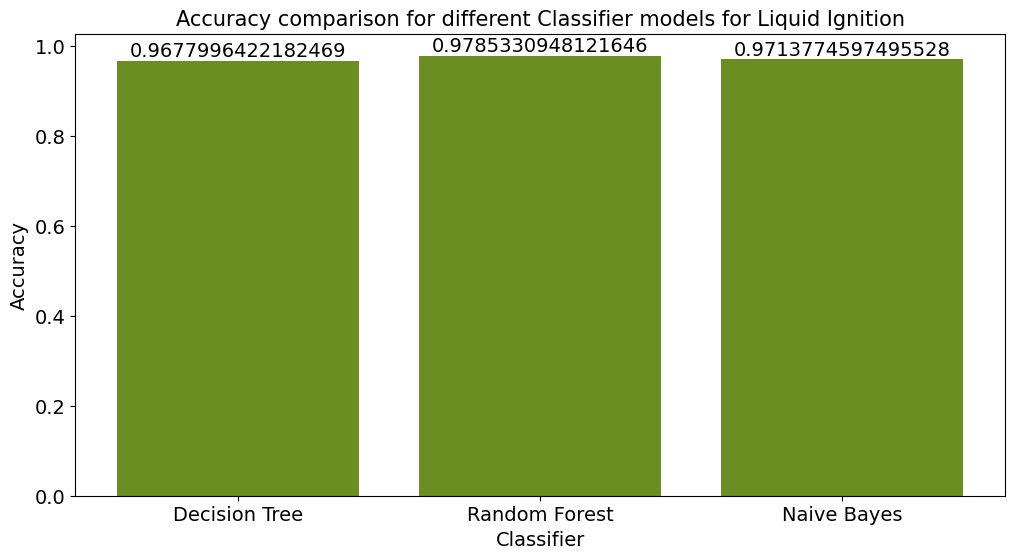

In [ ]:
import matplotlib.pyplot as plt

# Create plots for MSE of Different models for unintentional release

models = ['Decision Tree','Random Forest','Naive Bayes']
accuracy_percentage = [accuracy_Ignition_tree, accuracy_Ignition_rand, accuracy_Ignition_nb]

x = np.arange(len(models))

plt.figure(figsize=(12, 6))


plt.bar(x, accuracy_percentage, tick_label=models, align='center', color='olivedrab')
plt.title('Accuracy comparison for different Classifier models for Liquid Ignition')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, accuracy_percentage[i], str(accuracy_percentage[i]), ha='center', va='bottom')

plt.show()

# ***Liquid Explosion***

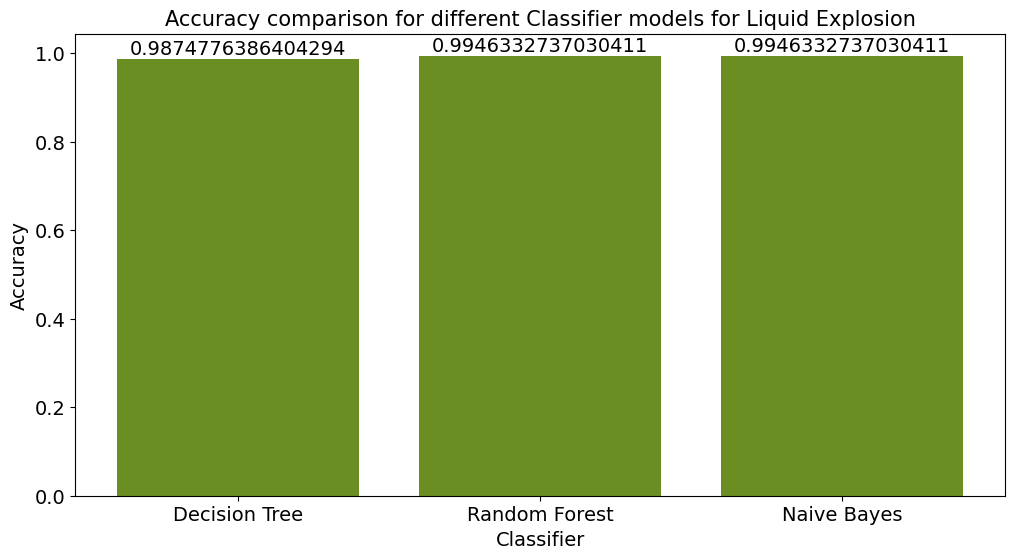

In [ ]:
import matplotlib.pyplot as plt

# Create plots for MSE of Different models for unintentional release

models = ['Decision Tree','Random Forest','Naive Bayes']
accuracy_percentage = [accuracy_Explosion_tree, accuracy_Explosion_rand, accuracy_Explosion_nb]

x = np.arange(len(models))

plt.figure(figsize=(12, 6))


plt.bar(x, accuracy_percentage, tick_label=models, align='center', color='olivedrab')
plt.title('Accuracy comparison for different Classifier models for Liquid Explosion')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.xticks(x, models)

for i in range(len(x)):
    plt.text(i, accuracy_percentage[i], str(accuracy_percentage[i]), ha='center', va='bottom')
plt.show()

# ***Pipeline Shutdown***

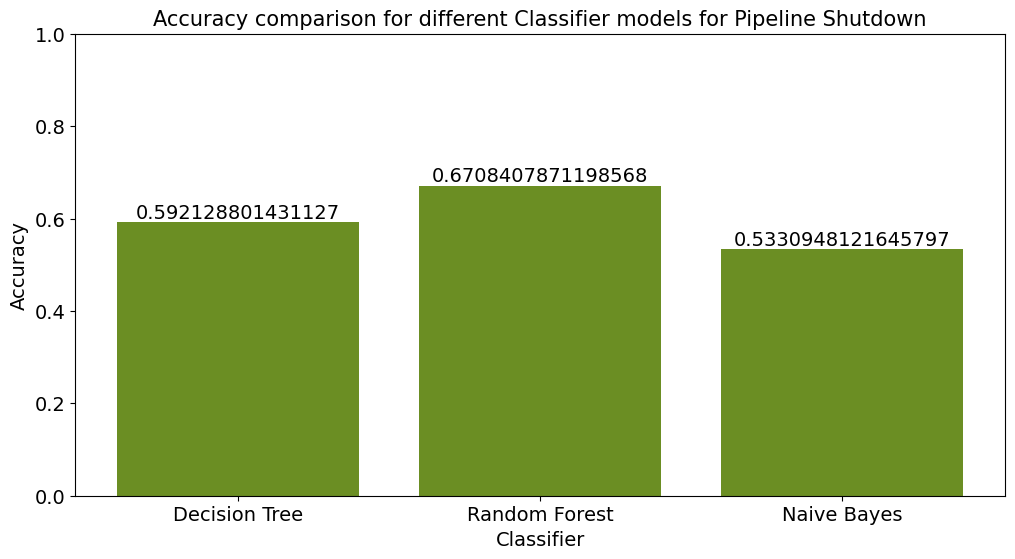

In [ ]:
import matplotlib.pyplot as plt



models = ['Decision Tree','Random Forest','Naive Bayes']
accuracy_percentage = [accuracy_Shutdown_tree, accuracy_Shutdown_rand, accuracy_Shutdown_nb]

x = np.arange(len(models))

plt.figure(figsize=(12, 6))


plt.bar(x, accuracy_percentage, tick_label=models, align='center', color='olivedrab')
plt.title('Accuracy comparison for different Classifier models for Pipeline Shutdown')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.xticks(x, models)
plt.ylim(0, 1)
for i in range(len(x)):
    plt.text(i, accuracy_percentage[i], str(accuracy_percentage[i]), ha='center', va='bottom')
plt.show()

# **Regression**

Regression models use algorithms that try to find the best fit line (or hyperplane in higher dimensions) to minimize the difference between the predicted values and the actual target values


1. **KNN**
2. **Random Forest**
3. **XGBoost**
4. **AdaBoost**


**Prepare Dataset for train-test split for Regression**

In [ ]:
df1.head(5)

,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Accident Date,Accident Month,Accident Day,Accident_Year
0,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0,MCPHERSON,MCPHERSON,...,1517.0,0.0,0.0,0.0,0.0,1627,1/1/2010,1,1,2010
1,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,RAYMOND,CUMBERLAND,...,8.0,0.0,0.0,0.0,0.0,4008,1/4/2010,1,4,2010
2,20160,"PETROLOGISTICS OLEFINS, LLC",0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,...,200.0,0.0,0.0,0.0,0.0,200,1/5/2010,1,5,2010
3,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SUPERIOR,DOUGLAS,...,40.0,0.0,11300.0,0.0,0.0,11540,1/6/2010,1,6,2010
4,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,SHERMAN,GRAYSON,...,150.0,0.0,7500.0,2000.0,0.0,29650,1/7/2010,1,7,2010


In [ ]:
#drop columns for regression

df2 = df1.drop(['Accident City','Accident County','Shutdown Date/Time','Restart Date/Time', 'Accident Date','Accident Month','Accident Day','Accident_Year','Pipeline/Facility Name', 'Operator Name', 'Operator ID','id','Operator Employee Injuries','Operator Contractor Injuries','Emergency Responder Injuries','Other Injuries','Public Injuries','Operator Employee Fatalities','Operator Contractor Fatalities','Emergency Responder Fatalities','Other Fatalities','Public Fatalities','Property Damage Costs','Lost Commodity Costs','Public/Private Property Damage Costs','Emergency Response Costs','Environmental Remediation Costs','Other Costs' ], axis=1)

KeyError: ignored

In [ ]:
df2.head(5)

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,...,Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,All Injuries,All Fatalities,All Costs
0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,...,0.1,0.00,21.0,NO,NO,NO,0.0,0.0,0.0,1627
1,ONSHORE,ABOVEGROUND,CRUDE OIL,0,0,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,...,0.0,0.12,0.0,NO,NO,0,0.0,0.0,0.0,4008
2,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,...,0.0,0.00,2.0,NO,NO,0,0.0,0.0,0.0,200
3,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,...,0.0,0.48,0.0,NO,NO,0,0.0,0.0,0.0,11540
4,ONSHORE,UNDERGROUND,CRUDE OIL,0,0,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,...,0.0,698.00,2.0,NO,NO,NO,0.0,0.0,0.0,29650


In [ ]:
# df2 = df2[['id'] + [col for col in df2.columns if col != 'id']]

In [ ]:
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pipeline Location                2795 non-null   object 
 1   Pipeline Type                    2795 non-null   object 
 2   Liquid Type                      2795 non-null   object 
 3   Liquid Subtype                   2795 non-null   object 
 4   Liquid Name                      2795 non-null   object 
 5   Accident State                   2795 non-null   object 
 6   Accident Latitude                2795 non-null   float64
 7   Accident Longitude               2795 non-null   float64
 8   Cause Category                   2795 non-null   object 
 9   Cause Subcategory                2795 non-null   object 
 10  Unintentional Release (Barrels)  2795 non-null   float64
 11  Intentional Release (Barrels)    2795 non-null   float64
 12  Liquid Recovery (Bar

None

In [ ]:
# Creating a dictionary to specify the replacements for each column
replacement_dict = {'Liquid Subtype': 'Unknown', 'Pipeline Type': 'Unknown','Pipeline Shutdown':'NO',
                    'Liquid Type': 'Unknown', 'Liquid Name': 'Unknown', 'Accident State': 'Unknown', 'Cause Category': 'Unknown',
                    'Cause Subcategory': 'Unknown' }
df2 = df2.replace(0,replacement_dict)

In [ ]:
df2.head(4)

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,...,Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,All Injuries,All Fatalities,All Costs
0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,Unknown,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,...,0.1,0.00,21.0,NO,NO,NO,0.0,0.0,0.0,1627
1,ONSHORE,ABOVEGROUND,CRUDE OIL,Unknown,Unknown,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,...,0.0,0.12,0.0,NO,NO,NO,0.0,0.0,0.0,4008
2,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,...,0.0,0.00,2.0,NO,NO,NO,0.0,0.0,0.0,200
3,ONSHORE,UNDERGROUND,CRUDE OIL,Unknown,Unknown,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,...,0.0,0.48,0.0,NO,NO,NO,0.0,0.0,0.0,11540


moving target columns to the last

In [ ]:
df2 = df2[[col for col in df2.columns if col != 'Unintentional Release (Barrels)'] + ['Unintentional Release (Barrels)']]

In [ ]:
df2 = df2[[col for col in df2.columns if col != 'Liquid Recovery (Barrels)'] + ['Liquid Recovery (Barrels)']]

In [ ]:
df2 = df2[[col for col in df2.columns if col != 'All Costs'] + ['All Costs']]

In [ ]:
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pipeline Location                2795 non-null   object 
 1   Pipeline Type                    2795 non-null   object 
 2   Liquid Type                      2795 non-null   object 
 3   Liquid Subtype                   2795 non-null   object 
 4   Liquid Name                      2795 non-null   object 
 5   Accident State                   2795 non-null   object 
 6   Accident Latitude                2795 non-null   float64
 7   Accident Longitude               2795 non-null   float64
 8   Cause Category                   2795 non-null   object 
 9   Cause Subcategory                2795 non-null   object 
 10  Intentional Release (Barrels)    2795 non-null   float64
 11  Liquid Recovery (Barrels)        2795 non-null   float64
 12  Net Loss (Barrels)  

None

**Train Test Split**

In [ ]:
X1 = df2.drop(df2.columns[-3:], axis=1)
y1 = df2[df2.columns[-3:]]


In [ ]:
counts = X1['Pipeline Shutdown'].value_counts()
counts

NO     1400
YES    1395
Name: Pipeline Shutdown, dtype: int64

In [ ]:
X1['Pipeline Shutdown'] = X1['Pipeline Shutdown'].replace("No", "NO")
counts = X1['Pipeline Shutdown'].value_counts()
counts

NO     1400
YES    1395
Name: Pipeline Shutdown, dtype: int64

In [ ]:
y1

,All Fatalities,All Costs,Unintentional Release (Barrels)
0,0.0,1627,21.00
1,0.0,4008,0.12
2,0.0,200,2.00
3,0.0,11540,0.48
4,0.0,29650,700.00
...,...,...,...
2790,0.0,61015,0.25
2791,0.0,105400,580.00
2792,0.0,15050,1.00
2793,0.0,41428,0.20


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [ ]:
from matplotlib.font_manager import X11FontDirectories
# Apply Label Encoding
X1['Pipeline Location'] = label_encoder.fit_transform(X1['Pipeline Location'])
X1['Pipeline Type'] = label_encoder.fit_transform(X1['Pipeline Type'])
X1['Pipeline Shutdown'] = label_encoder.fit_transform(X1['Pipeline Shutdown'])
X1['Liquid Type'] = label_encoder.fit_transform(X1['Liquid Type'])
X1['Liquid Subtype'] = label_encoder.fit_transform(X1['Liquid Subtype'])
X1['Liquid Name'] = label_encoder.fit_transform(X1['Liquid Name'])
X1['Accident State'] = label_encoder.fit_transform(X1['Accident State'])
X1['Cause Category'] = label_encoder.fit_transform(X1['Cause Category'])
X1['Cause Subcategory'] = label_encoder.fit_transform(X1['Cause Subcategory'])
X1['Liquid Ignition'] = label_encoder.fit_transform(X1['Liquid Ignition'])
X1['Liquid Ignition'] = label_encoder.fit_transform(X1['Liquid Ignition'])
X1['Liquid Explosion'] = label_encoder.fit_transform(X1['Liquid Explosion'])


In [ ]:
X1

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,All Injuries
0,1,0,3,4,63,13,38.670700,-97.781230,3,29,0.1,0.00,21.0,0,0,0,0.0,0.0
1,1,0,2,8,63,18,43.940280,-70.493360,4,32,0.0,0.12,0.0,0,0,0,0.0,0.0
2,1,0,3,7,16,15,30.182400,-93.352400,4,2,0.0,0.00,2.0,0,0,0,0.0,0.0
3,1,3,2,8,63,44,46.689300,-92.061200,5,33,0.0,0.48,0.0,0,0,0,0.0,0.0
4,1,3,2,8,63,39,33.582660,-96.648810,2,34,0.0,698.00,2.0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,0,2,8,63,21,39.517036,-93.486055,4,35,0.0,0.25,0.0,0,0,1,0.0,0.0
2791,1,3,3,7,2,15,30.332597,-91.274491,0,36,0.0,0.00,580.0,0,0,1,0.0,0.0
2792,1,1,2,8,63,32,35.565292,-96.454956,4,24,0.0,1.00,0.0,0,0,0,0.0,0.0
2793,1,3,4,5,63,34,40.631074,-80.440463,0,36,0.0,0.20,0.0,0,0,0,0.0,0.0


**Multicollinearity Check**

In [ ]:
columns_to_drop = ['All Costs', 'Unintentional Release (Barrels)']
Multi = df2.drop(columns=columns_to_drop).copy()
Multi

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,All Injuries,All Fatalities
0,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,Unknown,KS,38.670700,-97.781230,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,0.1,0.00,21.0,NO,NO,NO,0.0,0.0,0.0
1,ONSHORE,ABOVEGROUND,CRUDE OIL,Unknown,Unknown,ME,43.940280,-70.493360,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.0,0.12,0.0,NO,NO,NO,0.0,0.0,0.0
2,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,LA,30.182400,-93.352400,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,0.0,0.00,2.0,NO,NO,NO,0.0,0.0,0.0
3,ONSHORE,UNDERGROUND,CRUDE OIL,Unknown,Unknown,WI,46.689300,-92.061200,NATURAL FORCE DAMAGE,TEMPERATURE,0.0,0.48,0.0,NO,NO,NO,0.0,0.0,0.0
4,ONSHORE,UNDERGROUND,CRUDE OIL,Unknown,Unknown,TX,33.582660,-96.648810,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,0.0,698.00,2.0,NO,NO,NO,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,ONSHORE,ABOVEGROUND,CRUDE OIL,Unknown,Unknown,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.0,0.25,0.0,NO,NO,YES,0.0,0.0,0.0
2791,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,"98.7% ETHANE, .97% METHANE, .36% PROPANE",LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,0.0,0.00,580.0,NO,NO,YES,0.0,0.0,0.0
2792,ONSHORE,TANK,CRUDE OIL,Unknown,Unknown,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,0.0,1.00,0.0,NO,NO,NO,0.0,0.0,0.0
2793,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER...,Unknown,PA,40.631074,-80.440463,ALL OTHER CAUSES,UNKNOWN,0.0,0.20,0.0,NO,NO,NO,0.0,0.0,0.0


In [ ]:
Multi['Pipeline Shutdown'] = Multi['Pipeline Shutdown'].replace("No", "NO")
counts = Multi['Pipeline Shutdown'].value_counts()
counts

NO     1400
YES    1395
Name: Pipeline Shutdown, dtype: int64

In [ ]:
# Apply Label Encoding
Multi['Pipeline Location'] = label_encoder.fit_transform(Multi['Pipeline Location'])
Multi['Pipeline Type'] = label_encoder.fit_transform(Multi['Pipeline Type'])
Multi['Pipeline Shutdown'] = label_encoder.fit_transform(Multi['Pipeline Shutdown'])
Multi['Liquid Type'] = label_encoder.fit_transform(Multi['Liquid Type'])
Multi['Liquid Subtype'] = label_encoder.fit_transform(Multi['Liquid Subtype'])
Multi['Liquid Name'] = label_encoder.fit_transform(Multi['Liquid Name'])
Multi['Accident State'] = label_encoder.fit_transform(Multi['Accident State'])
Multi['Cause Category'] = label_encoder.fit_transform(Multi['Cause Category'])
Multi['Cause Subcategory'] = label_encoder.fit_transform(Multi['Cause Subcategory'])
Multi['Liquid Ignition'] = label_encoder.fit_transform(Multi['Liquid Ignition'])
Multi['Liquid Ignition'] = label_encoder.fit_transform(Multi['Liquid Ignition'])
Multi['Liquid Explosion'] = label_encoder.fit_transform(Multi['Liquid Explosion'])

In [ ]:
Multi

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,All Injuries,All Fatalities
0,1,0,3,4,63,13,38.670700,-97.781230,3,29,0.1,0.00,21.0,0,0,0,0.0,0.0,0.0
1,1,0,2,8,63,18,43.940280,-70.493360,4,32,0.0,0.12,0.0,0,0,0,0.0,0.0,0.0
2,1,0,3,7,16,15,30.182400,-93.352400,4,2,0.0,0.00,2.0,0,0,0,0.0,0.0,0.0
3,1,3,2,8,63,44,46.689300,-92.061200,5,33,0.0,0.48,0.0,0,0,0,0.0,0.0,0.0
4,1,3,2,8,63,39,33.582660,-96.648810,2,34,0.0,698.00,2.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,0,2,8,63,21,39.517036,-93.486055,4,35,0.0,0.25,0.0,0,0,1,0.0,0.0,0.0
2791,1,3,3,7,2,15,30.332597,-91.274491,0,36,0.0,0.00,580.0,0,0,1,0.0,0.0,0.0
2792,1,1,2,8,63,32,35.565292,-96.454956,4,24,0.0,1.00,0.0,0,0,0,0.0,0.0,0.0
2793,1,3,4,5,63,34,40.631074,-80.440463,0,36,0.0,0.20,0.0,0,0,0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multi_2 = pd.DataFrame(Multi)
Multi_2

,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,All Injuries,All Fatalities
0,1,0,3,4,63,13,38.670700,-97.781230,3,29,0.1,0.00,21.0,0,0,0,0.0,0.0,0.0
1,1,0,2,8,63,18,43.940280,-70.493360,4,32,0.0,0.12,0.0,0,0,0,0.0,0.0,0.0
2,1,0,3,7,16,15,30.182400,-93.352400,4,2,0.0,0.00,2.0,0,0,0,0.0,0.0,0.0
3,1,3,2,8,63,44,46.689300,-92.061200,5,33,0.0,0.48,0.0,0,0,0,0.0,0.0,0.0
4,1,3,2,8,63,39,33.582660,-96.648810,2,34,0.0,698.00,2.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,0,2,8,63,21,39.517036,-93.486055,4,35,0.0,0.25,0.0,0,0,1,0.0,0.0,0.0
2791,1,3,3,7,2,15,30.332597,-91.274491,0,36,0.0,0.00,580.0,0,0,1,0.0,0.0,0.0
2792,1,1,2,8,63,32,35.565292,-96.454956,4,24,0.0,1.00,0.0,0,0,0,0.0,0.0,0.0
2793,1,3,4,5,63,34,40.631074,-80.440463,0,36,0.0,0.20,0.0,0,0,0,0.0,0.0,0.0


In [ ]:
# Separate the response variable from the predictor variables
X = Multi_2.drop(columns=['Liquid Recovery (Barrels)'])


In [ ]:
# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)















                          Feature         VIF
0               Pipeline Location  120.320360
1                   Pipeline Type    2.211035
2                     Liquid Type   31.370247
3                  Liquid Subtype   19.738571
4                     Liquid Name   39.540424
5                  Accident State    5.974490
6               Accident Latitude   44.171883
7              Accident Longitude   59.422562
8                  Cause Category    6.570402
9               Cause Subcategory    5.651178
10  Intentional Release (Barrels)    1.020580
11             Net Loss (Barrels)    1.226617
12                Liquid Ignition    1.324059
13               Liquid Explosion    1.337736
14              Pipeline Shutdown    2.074629
15             Public Evacuations    1.022872
16                   All Injuries    2.127654
17                 All Fatalities    2.108516


In [ ]:
# Correlation Matrix

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Display the eigenvalues
print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[2.18856607 2.05754932 1.62459398 0.09908876 0.27083662 1.43225534
 1.34095548 0.52457825 0.55567138 0.63828633 0.72798559 1.05708349
 1.02467541 0.99395581 0.9498593  0.87273106 0.80857877 0.83274902]


**Linearity Assumptions**

 **Independence Assumption**

 **Equal Variance Assumption**

 **Normality Assumption**

In [ ]:
y1.columns

Index(['Unintentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'All Costs'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Converting the target column to numeric using label encoding

#label_encoder = LabelEncoder()

# Convert categorical features to numeric using one-hot encoding

#X1 = pd.get_dummies(X1, columns=X1.select_dtypes(include=['object']).columns)



In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_tr.shape)
print("X_test shape:", X_te.shape)
print("y_train shape:", y_tr.shape)
print("y_test shape:", y_te.shape)

X_train shape: (2236, 18)
X_test shape: (559, 18)
y_train shape: (2236, 3)
y_test shape: (559, 3)


In [ ]:
y_te.iloc[:, 0]

1025    0.0
2407    0.0
450     0.0
2594    0.0
439     0.0
       ... 
1628    0.0
958     0.0
2236    0.0
461     0.0
1582    0.0
Name: All Fatalities, Length: 559, dtype: float64

In [ ]:
y_te.iloc[:, 1]

1025      62477
2407      25025
450      559500
2594     424700
439       20754
         ...   
1628      19043
958        3600
2236       3770
461       41125
1582    7174939
Name: All Costs, Length: 559, dtype: int64

In [ ]:
y_te.iloc[:, 2]

1025      62477
2407      25025
450      559500
2594     424700
439       20754
         ...   
1628      19043
958        3600
2236       3770
461       41125
1582    7174939
Name: All Costs, Length: 559, dtype: int64

# **Linear Regression**

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
# Creating a Linear Regression model for each target column
Unintentional_Release_lr = LinearRegression()
Liquid_Recovery_lr = LinearRegression()
All_Costs_lr = LinearRegression()

In [ ]:
# Fitting the models on the training data

Unintentional_Release_lr.fit(X_tr, y_tr.iloc[:, 0])
Liquid_Recovery_lr.fit(X_tr, y_tr.iloc[:, 1])
All_Costs_lr.fit(X_tr, y_tr.iloc[:, 2])

LinearRegression()

In [ ]:
# predictions on the test data
y_pred_Unintentional = Unintentional_Release_lr.predict(X_te)
y_pred_Liquid_Recovery = Liquid_Recovery_lr.predict(X_te)
y_pred_All_Costs = All_Costs_lr.predict(X_te)

In [ ]:
# Calculating residuals
residuals = y_te.iloc[:, 0] - y_pred_Unintentional



In [ ]:
import matplotlib.pyplot as plt
# Plotting the residuals against the predicted y values
plt.scatter(y_pred_Unintentional, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted y values for Unintentional')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')


# Setting x and y-axis limits to zoom in on the values
plt.xlim(-100, 100)
plt.ylim(-500, 500)  # Adjust the limits as per your desired zoom level

plt.show()

NameError: ignored

In [ ]:
# for regression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Evaluate the models
mse_1 = mean_squared_error(y_te.iloc[:, 0], y_pred_Unintentional)
mse_2 = mean_squared_error(y_te.iloc[:, 1], y_pred_Liquid_Recovery)
mse_3 = mean_squared_error(y_te.iloc[:, 2], y_pred_All_Costs)

In [ ]:
r2_1 = r2_score(y_te.iloc[:, 0], y_pred_Unintentional)
r2_2 = r2_score(y_te.iloc[:, 1], y_pred_Liquid_Recovery)
r2_3 = r2_score(y_te.iloc[:, 2], y_pred_All_Costs)

In [ ]:
print("Unintentional_Release -LR- Mean Squared Error:", mse_1)
print("Unintentional_Release -LR- R-squared:", r2_1)

Unintentional_Release -LR- Mean Squared Error: 0.009663953918010672
Unintentional_Release -LR- R-squared: -4.411831512999812


In [ ]:
print("Liquid_Recovery -LR- Mean Squared Error:", mse_2)
print("Liquid_Recovery -LR- R-squared:", r2_2)

Liquid_Recovery -LR- Mean Squared Error: 1239014214042350.2
Liquid_Recovery -LR- R-squared: 0.05744490883289566


In [ ]:
# print("All_Costs -LR- Mean Squared Error:", mse_3)
# print("All_Costs -LR- R-squared:", r2_3)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k_neighbors = 5

In [ ]:
# Creating a KNN Regressor model for each target column
Unintentional_Release_knn = KNeighborsRegressor(n_neighbors=k_neighbors)
Liquid_Recovery_knn = KNeighborsRegressor(n_neighbors=k_neighbors)
All_Costs_knn = KNeighborsRegressor(n_neighbors=k_neighbors)

In [ ]:
# Fitting the models on the training data

Unintentional_Release_knn.fit(X_tr, y_tr.iloc[:, 0])
Liquid_Recovery_knn.fit(X_tr, y_tr.iloc[:, 1])
All_Costs_knn.fit(X_tr, y_tr.iloc[:, 2])

KNeighborsRegressor()

In [ ]:
# predictions on the test data
y_pred_Unintentional_knn = Unintentional_Release_knn.predict(X_te)
y_pred_Liquid_Recovery_knn = Liquid_Recovery_knn.predict(X_te)
y_pred_All_Costs_knn = All_Costs_knn.predict(X_te)

In [ ]:
# Evaluate the models
mse_1_knn = mean_squared_error(y_te.iloc[:, 0], y_pred_Unintentional_knn)
mse_2_knn = mean_squared_error(y_te.iloc[:, 1], y_pred_Liquid_Recovery_knn)
mse_3_knn = mean_squared_error(y_te.iloc[:, 2], y_pred_All_Costs_knn)

In [ ]:
r2_1_knn = r2_score(y_te.iloc[:, 0], y_pred_Unintentional_knn)
r2_2_knn = r2_score(y_te.iloc[:, 1], y_pred_Liquid_Recovery_knn)
r2_3_knn = r2_score(y_te.iloc[:, 2], y_pred_All_Costs_knn)

In [ ]:
print("Unintentional_Release - KNN - Mean Squared Error:", mse_1_knn)
print("Unintentional_Release - KNN - R-squared:", r2_1_knn)

Unintentional_Release - KNN - Mean Squared Error: 0.002862254025044723
Unintentional_Release - KNN - R-squared: -0.6028673835125458


In [ ]:
print("Liquid_Recovery - KNN - Mean Squared Error:", mse_2_knn)
print("Liquid_Recovery - KNN - R-squared:", r2_2_knn)

Liquid_Recovery - KNN - Mean Squared Error: 1277384032451281.8
Liquid_Recovery - KNN - R-squared: 0.028255842816854337


In [ ]:
print("All_Costs - KNN - Mean Squared Error:", mse_3_knn)
print("All_Costs - KNN - R-squared:", r2_3_knn)

All_Costs - KNN - Mean Squared Error: 492040.89216288377
All_Costs - KNN - R-squared: 0.8544768733571099


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
num_estimators = 100

# Creating a Random Forest Regressor model for each target column
Unintentional_Release_rand = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
Liquid_Recovery_rand = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
All_Costs_rand = RandomForestRegressor(n_estimators=num_estimators, random_state=42)

In [ ]:
# Fitting the models on the training data

Unintentional_Release_rand.fit(X_tr, y_tr.iloc[:, 0])
Liquid_Recovery_rand.fit(X_tr, y_tr.iloc[:, 1])
All_Costs_rand.fit(X_tr, y_tr.iloc[:, 2])

RandomForestRegressor(random_state=42)

In [ ]:
# predictions on the test data
y_pred_Unintentional_rand = Unintentional_Release_rand.predict(X_te)
y_pred_Liquid_Recovery_rand = Liquid_Recovery_rand.predict(X_te)
y_pred_All_Costs_rand = All_Costs_rand.predict(X_te)

In [ ]:
# Evaluate the models
mse_1_rand = mean_squared_error(y_te.iloc[:, 0], y_pred_Unintentional_rand)
mse_2_rand = mean_squared_error(y_te.iloc[:, 1], y_pred_Liquid_Recovery_rand)
mse_3_rand = mean_squared_error(y_te.iloc[:, 2], y_pred_All_Costs_rand)

In [ ]:
r2_1_rand = r2_score(y_te.iloc[:, 0], y_pred_Unintentional_rand)
r2_2_rand = r2_score(y_te.iloc[:, 1], y_pred_Liquid_Recovery_rand)
r2_3_rand = r2_score(y_te.iloc[:, 2], y_pred_All_Costs_rand)

In [ ]:
print("Unintentional_Release -Random Forest- Mean Squared Error:", mse_1_rand)
print("Unintentional_Release -Random Forest- R-squared:", r2_1_rand)

Unintentional_Release -Random Forest- Mean Squared Error: 0.006918067978533095
Unintentional_Release -Random Forest- R-squared: -2.874130465949823


In [ ]:
print("Liquid_Recovery -Random Forest- Mean Squared Error:", mse_2_rand)
print("Liquid_Recovery -Random Forest- R-squared:", r2_2_rand)

Liquid_Recovery -Random Forest- Mean Squared Error: 1188758527856266.2
Liquid_Recovery -Random Forest- R-squared: 0.09567590920233171


In [ ]:
print("All_Costs -Random Forest- Mean Squared Error:", mse_3_rand)
print("All_Costs -Random Forest- R-squared:", r2_3_rand)

All_Costs -Random Forest- Mean Squared Error: 543448.5015603465
All_Costs -Random Forest- R-squared: 0.8392728604957587


# **SVR** (Support Vector Regression)

In [ ]:
from sklearn.svm import SVR

# Creating and fitting the SVR model for each target colum (the hyperparameters 'C', 'epsilon', and 'kernel' can be adjusted as needed)

Unintentional_Release_SVR = SVR(C=1.0, epsilon=0.1, kernel='linear')
Liquid_Recovery_SVR = SVR(C=1.0, epsilon=0.1, kernel='linear')
All_Costs_SVR = SVR(C=1.0, epsilon=0.1, kernel='linear')

In [ ]:
# Fitting the models on the training data

Unintentional_Release_SVR.fit(X_tr, y_tr.iloc[:, 0])
Liquid_Recovery_SVR.fit(X_tr, y_tr.iloc[:, 1])
All_Costs_SVR.fit(X_tr, y_tr.iloc[:, 2])

In [ ]:
# predictions on the test data
y_pred_Unintentional_SVR = Unintentional_Release_SVR.predict(X_te)
y_pred_Liquid_Recovery_SVR = Liquid_Recovery_SVR.predict(X_te)
y_pred_All_Costs_SVR = All_Costs_SVR.predict(X_te)

In [ ]:
# Evaluate the models
mse_1_SVR = mean_squared_error(y_te.iloc[:, 0], y_pred_Unintentional_SVR)
mse_2_SVR = mean_squared_error(y_te.iloc[:, 1], y_pred_Liquid_Recovery_SVR)
mse_3_SVR = mean_squared_error(y_te.iloc[:, 2], y_pred_All_Costs_SVR)

In [ ]:
r2_1_SVR = r2_score(y_te.iloc[:, 0], y_pred_Unintentional_SVR)
r2_2_SVR = r2_score(y_te.iloc[:, 1], y_pred_Liquid_Recovery_SVR)
r2_3_SVR = r2_score(y_te.iloc[:, 2], y_pred_All_Costs_SVR)

In [ ]:
print("Unintentional_Release -SVR- Mean Squared Error:", mse_1_SVR)
print("Unintentional_Release -SVR- R-squared:", r2_1_SVR)

In [ ]:
print("Liquid_Recovery -SVR- Mean Squared Error:", mse_2_SVR)
print("Liquid_Recovery -SVR- R-squared:", r2_2_SVR)

In [ ]:
print("All_Costs -SVR- Mean Squared Error:", mse_3_SVR)
print("All_Costs -SVR- R-squared:", r2_3_SVR)

# **XGBoost**

In [ ]:
from xgboost import XGBRegressor

import xgboost as xgb

num_estimators = 50

# Creating a Random Forest Regressor model for each target column
Unintentional_Release_XGB = xgb.XGBRegressor(n_estimators=num_estimators, random_state=42)
Liquid_Recovery_XGB = xgb.XGBRegressor(n_estimators=num_estimators, random_state=42)
All_Costs_XGB = xgb.XGBRegressor(n_estimators=num_estimators, random_state=42)

Hyperparameter tuning for XGBoost

In [ ]:
#Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate for boosting
    'max_depth': [3, 4, 5],               # Maximum depth of a tree
    # You can add more hyperparameters here as needed

}

In [ ]:
#Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_Unintentional = GridSearchCV(
    estimator=Unintentional_Release_XGB,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # You can use other scoring metrics
    cv=3  # Number of cross-validation folds
)

grid_search_Liquid_Recovery = GridSearchCV(
    estimator=Liquid_Recovery_XGB,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # You can use other scoring metrics
    cv=3  # Number of cross-validation folds
)

grid_search_All_Costs = GridSearchCV(
    estimator=All_Costs_XGB,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # You can use other scoring metrics
    cv=3  # Number of cross-validation folds
)


In [ ]:
grid_search_Unintentional.fit(X_tr, y_tr.iloc[:, 0])
grid_search_Liquid_Recovery.fit(X_tr, y_tr.iloc[:, 1])
grid_search_All_Costs.fit(X_tr, y_tr.iloc[:, 2])

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=50,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters from the grid search
best_params_Unintentional = grid_search_Unintentional.best_params_

print("Best Parameters:", best_params_Unintentional)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
# Get the best parameters from the grid search
best_params_Liquid_Recovery = grid_search_Liquid_Recovery.best_params_

print("Best Parameters:", best_params_Liquid_Recovery)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}


In [ ]:
# Get the best parameters from the grid search
best_params_All_Costs = grid_search_All_Costs.best_params_

print("Best Parameters:", best_params_All_Costs)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}


In [ ]:
# Get the best model from the grid search
best_model_Unintentional = grid_search_Unintentional.best_estimator_
best_model_Liquid_Recovery = grid_search_Liquid_Recovery.best_estimator_
best_model_All_Costs = grid_search_All_Costs.best_estimator_

In [ ]:
# Make predictions with the best model on the test set
y_pred_Unintentional_XGB = best_model_Unintentional.predict(X_te)
y_pred_Liquid_Recovery_XGB = best_model_Liquid_Recovery.predict(X_te)
y_pred_All_Costs_XGB = best_model_All_Costs.predict(X_te)

In [ ]:
# Evaluate the models
mse_1_XGB = mean_squared_error(y_te.iloc[:, 0], y_pred_Unintentional_XGB)
mse_2_XGB = mean_squared_error(y_te.iloc[:, 1], y_pred_Liquid_Recovery_XGB)
mse_3_XGB = mean_squared_error(y_te.iloc[:, 2], y_pred_All_Costs_XGB)

In [ ]:
r2_1_XGB = r2_score(y_te.iloc[:, 0], y_pred_Unintentional_XGB)
r2_2_XGB = r2_score(y_te.iloc[:, 1], y_pred_Liquid_Recovery_XGB)
r2_3_XGB = r2_score(y_te.iloc[:, 2], y_pred_All_Costs_XGB)

In [ ]:
print("Unintentional_Release -XGBoost- Mean Squared Error:", mse_1_XGB)
print("Unintentional_Release -XGBoost- R-squared:", r2_1_XGB)

Unintentional_Release -XGBoost- Mean Squared Error: 0.009336196774668317
Unintentional_Release -XGBoost- R-squared: -4.228286925349699


In [ ]:
print("Liquid_Recovery -XGBoost- Mean Squared Error:", mse_2_XGB)
print("Liquid_Recovery -XGBoost- R-squared:", r2_2_XGB)

Liquid_Recovery -XGBoost- Mean Squared Error: 1047048930499015.9
Liquid_Recovery -XGBoost- R-squared: 0.20347862925389637


In [ ]:
print("All_Costs -XGBoost- Mean Squared Error:", mse_3_XGB)
print("All_Costs -XGBoost- R-squared:", r2_3_XGB)

All_Costs -XGBoost- Mean Squared Error: 289831.16777656466
All_Costs -XGBoost- R-squared: 0.9142812347404582


# **Ada Boost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(max_depth=3)  # Weak learner (decision tree)
n_estimators = 100


Unintentional_Release_AdaBoost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
Liquid_Recovery_AdaBoost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
All_Costs_AdaBoost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

Hyperparameter Tuning for Ada Boost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
# Create the GridSearchCV object

grid_search_Unintentional_Release_AdaBoost = GridSearchCV(estimator=Unintentional_Release_AdaBoost, param_grid=param_grid_ada,
                           scoring='neg_mean_squared_error', cv=3, verbose=2)


grid_search_Liquid_Recovery_AdaBoost = GridSearchCV(estimator=Liquid_Recovery_AdaBoost, param_grid=param_grid_ada,
                           scoring='neg_mean_squared_error', cv=3, verbose=2)


grid_search_All_Costs_AdaBoost = GridSearchCV(estimator=All_Costs_AdaBoost, param_grid=param_grid_ada,
                           scoring='neg_mean_squared_error', cv=3, verbose=2)

In [ ]:
grid_search_Unintentional_Release_AdaBoost.fit(X_tr, y_tr.iloc[:, 0])
grid_search_Liquid_Recovery_AdaBoost.fit(X_tr, y_tr.iloc[:, 1])
grid_search_All_Costs_AdaBoost.fit(X_tr, y_tr.iloc[:, 2])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.0s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.0s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.0s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.0s
Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.7s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_params_Unintentional_ada = grid_search_Unintentional_Release_AdaBoost.best_estimator_

print("Best Parameters:", best_params_Unintentional_ada)

Best Parameters: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, random_state=42)


In [ ]:
best_params_Liquid_Recovery_AdaBoost = grid_search_Liquid_Recovery_AdaBoost.best_estimator_

print("Best Parameters:", best_params_Liquid_Recovery_AdaBoost)

Best Parameters: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.2, random_state=42)


In [ ]:
best_params_All_Costs_AdaBoost = grid_search_All_Costs_AdaBoost.best_estimator_

print("Best Parameters:", best_params_All_Costs_AdaBoost)

Best Parameters: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.01, random_state=42)


In [ ]:
y_pred_Unintentional_AdaBoost = best_params_Unintentional_ada.predict(X_te)
y_pred_Liquid_Recovery_AdaBoost = best_params_Liquid_Recovery_AdaBoost.predict(X_te)
y_pred_All_Costs_AdaBoost = best_params_All_Costs_AdaBoost.predict(X_te)

In [ ]:
mse_1_AdaBoost = mean_squared_error(y_te.iloc[:, 0], y_pred_Unintentional_AdaBoost)
mse_2_AdaBoost = mean_squared_error(y_te.iloc[:, 1], y_pred_Liquid_Recovery_AdaBoost)
mse_3_AdaBoost = mean_squared_error(y_te.iloc[:, 2], y_pred_All_Costs_AdaBoost)

In [ ]:
print("Unintentional_Release -AdaBoost- Mean Squared Error:", mse_1_AdaBoost)
print("Liquid_Recovery -AdaBoost- Mean Squared Error:", mse_2_AdaBoost)
print("All_Costs -AdaBoost- Mean Squared Error:", mse_3_AdaBoost)

Unintentional_Release -AdaBoost- Mean Squared Error: 0.010413740928691094
Liquid_Recovery -AdaBoost- Mean Squared Error: 1291244748294356.5
All_Costs -AdaBoost- Mean Squared Error: 531217.1078243615


In [ ]:
r2_1_AdaBoost = r2_score(y_te.iloc[:, 0], y_pred_Unintentional_AdaBoost)
r2_2_AdaBoost = r2_score(y_te.iloc[:, 1], y_pred_Liquid_Recovery_AdaBoost)
r2_3_AdaBoost = r2_score(y_te.iloc[:, 2], y_pred_All_Costs_AdaBoost)

In [ ]:
print("Unintentional_Release -AdaBoost- R-squared:", r2_1_AdaBoost)
print("Liquid_Recovery -AdaBoost- R-squared:", r2_2_AdaBoost)
print("All_Costs -AdaBoost- R-squared:", r2_3_AdaBoost)

Unintentional_Release -AdaBoost- R-squared: -4.831713582685168
Liquid_Recovery -AdaBoost- R-squared: 0.01771158260010741
All_Costs -AdaBoost- R-squared: 0.8428903457251602


# **Comparison of Different Regression Models**

# ***Unintentional Release***

**MSE**

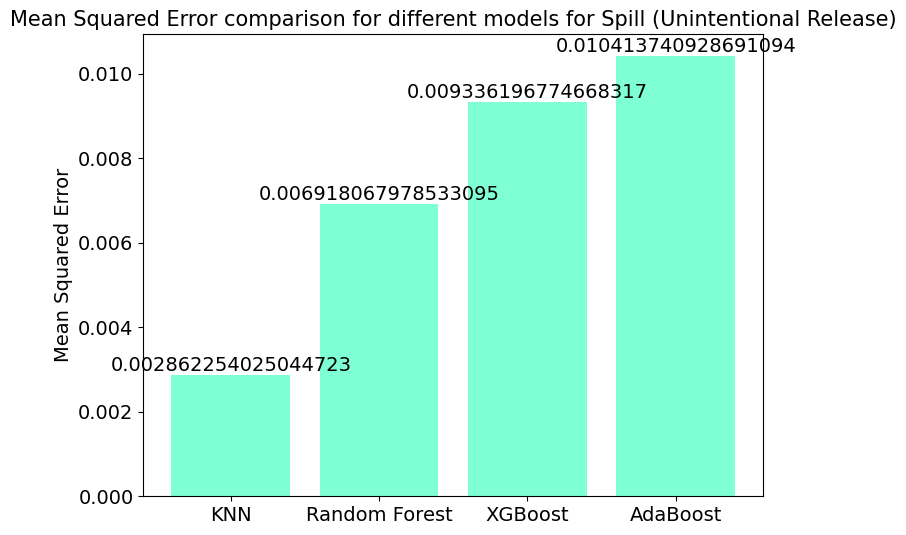

In [ ]:
# Create plots for MSE of Different models for unintentional release

models = ['KNN','Random Forest','XGBoost','AdaBoost']
mse_values = [mse_1_knn, mse_1_rand,mse_1_XGB, mse_1_AdaBoost]

x = np.arange(len(models))

plt.figure(figsize=(8, 6))


plt.bar(x, mse_values, tick_label=models, align='center', color='aquamarine')
plt.title('Mean Squared Error comparison for different models for Spill (Unintentional Release)')
#plt.xlabel('Diffrent Regression Models for Spill (Unintentional Release)')
plt.ylabel('Mean Squared Error')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, mse_values[i], str(mse_values[i]), ha='center', va='bottom')
plt.show()

**R2**

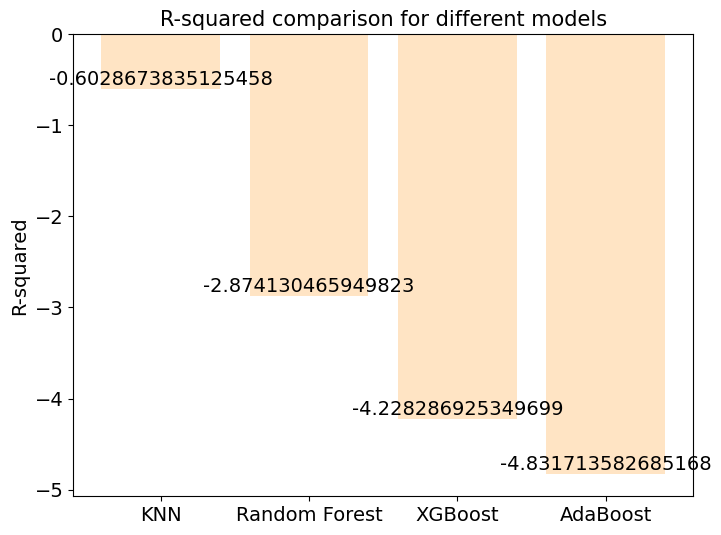

In [ ]:
models = ['KNN','Random Forest','XGBoost','AdaBoost']

r2_values = [r2_1_knn ,r2_1_rand,r2_1_XGB, r2_1_AdaBoost]

x = np.arange(len(models))

plt.figure(figsize=(8,6))


plt.bar(x, r2_values, tick_label=models, align='center', color='bisque')
plt.title('R-squared comparison for different models')
#plt.xlabel('Diffrent Regression Models')
plt.ylabel('R-squared')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, r2_values[i], str(r2_values[i]), ha='center', va='bottom')
plt.show()

# ***Liquid Recovery***

**MSE**

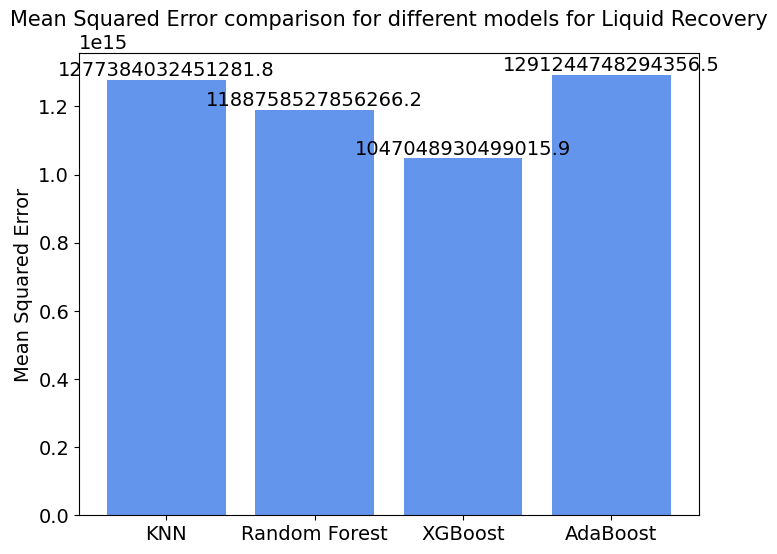

In [ ]:
models = ['KNN','Random Forest','XGBoost','AdaBoost']
mse_values = [mse_2_knn, mse_2_rand,mse_2_XGB, mse_2_AdaBoost]

x = np.arange(len(models))

plt.figure(figsize=(8, 6))


plt.bar(x, mse_values, tick_label=models, align='center', color='cornflowerblue')
plt.title('Mean Squared Error comparison for different models for Liquid Recovery')
#plt.xlabel('Diffrent Regression Models')
plt.ylabel('Mean Squared Error')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, mse_values[i], str(mse_values[i]), ha='center', va='bottom')

plt.show()

**R2**

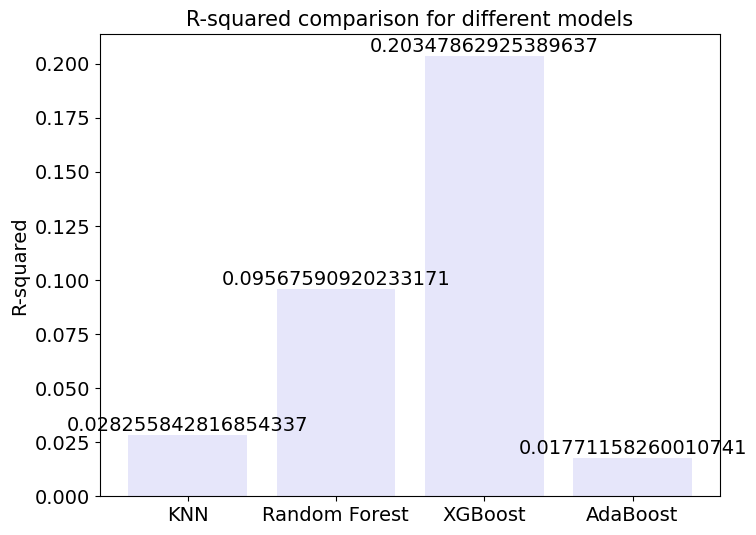

In [ ]:
models = ['KNN','Random Forest','XGBoost','AdaBoost']

r2_values = [r2_2_knn ,r2_2_rand,r2_2_XGB, r2_2_AdaBoost]

x = np.arange(len(models))

plt.figure(figsize=(8,6))


plt.bar(x, r2_values, tick_label=models, align='center', color='lavender')
plt.title('R-squared comparison for different models')
#plt.xlabel('Diffrent Regression Models')
plt.ylabel('R-squared')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, r2_values[i], str(r2_values[i]), ha='center', va='bottom')
plt.show()

# ***All Costs Due to Spills***

**MSE**

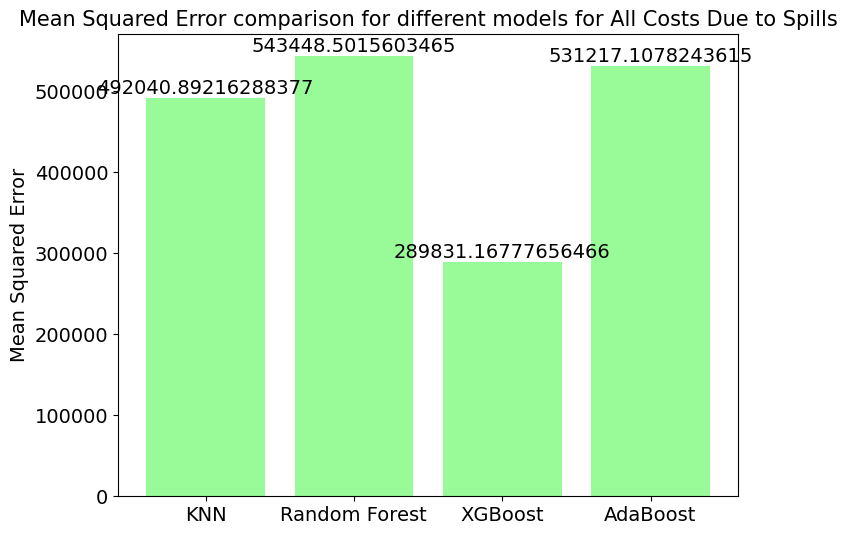

In [ ]:
models = ['KNN','Random Forest','XGBoost','AdaBoost']
mse_values = [mse_3_knn, mse_3_rand,mse_3_XGB, mse_3_AdaBoost]

x = np.arange(len(models))

plt.figure(figsize=(8, 6))


plt.bar(x, mse_values, tick_label=models, align='center', color='palegreen')
plt.title('Mean Squared Error comparison for different models for All Costs Due to Spills')
#plt.xlabel('Diffrent Regression Models')
plt.ylabel('Mean Squared Error')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, mse_values[i], str(mse_values[i]), ha='center', va='bottom')

plt.show()

**R2**

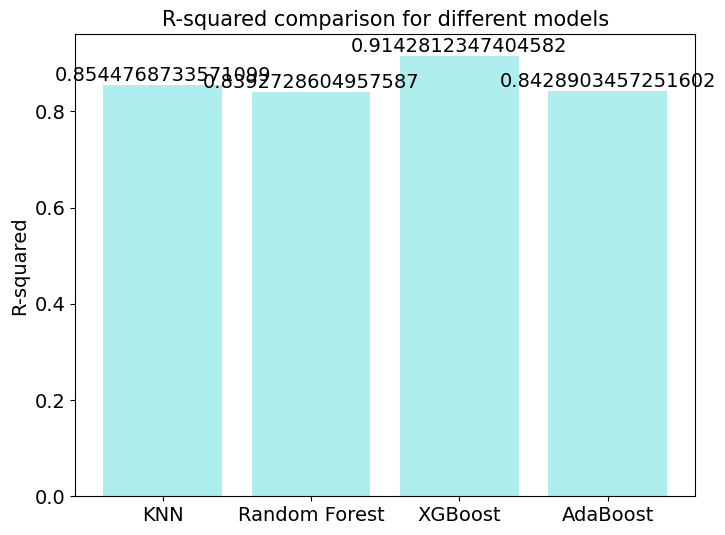

In [ ]:
models = ['KNN','Random Forest','XGBoost','AdaBoost']

r2_values = [r2_3_knn ,r2_3_rand,r2_3_XGB, r2_3_AdaBoost]

x = np.arange(len(models))

plt.figure(figsize=(8,6))


plt.bar(x, r2_values, tick_label=models, align='center', color='paleturquoise')
plt.title('R-squared comparison for different models')
#plt.xlabel('Diffrent Regression Models')
plt.ylabel('R-squared')

plt.xticks(x, models)
for i in range(len(x)):
    plt.text(i, r2_values[i], str(r2_values[i]), ha='center', va='bottom')
plt.show()